# Twitter-Bitcoin Correlation Analysis

## 1. Correlation with Sentimental Data & Price of Bitcoin

- Bitcoin 가격과 김도영 학우가 만든 전처리기, 감성분석기를 이용해 상관관계를 확인하기 전 데이터에 대한 분석을 진행하였습니다. 

### 1.1 필요한 라이브러리 import

In [1]:
# nltk 활용을 위한 불용어 다운로드
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kimjuwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [111]:
import pandas as pd
from sentimentalAnalysis import sentimental_analysis
import matplotlib.pyplot as plt
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from coincrawler import coin_crawl_his
from data_pipeline import coin_data_pipeline
from data_concat import data_concat
import statsmodels.api as sm 
import numpy as np

### 1.2 필요한 데이터 로드 

- Bitcoin_tweet.csv 파일을 로드하고 해당 어트리뷰트는 무엇인지 데이터 수 등 파악
- 'text'라는 컬럼부분을 'tweet'으로 바꿈 
- 데이터를 파악하여 칼럼 값에 결측치가 있는 것을 확인하였음. 결측치가 있을 경우 학습이 안될 가능성이 높고, compile이 되지 않을 가능성이 높으므로 해당값을 제거해주는 방식으로 코딩을 진행하였음

In [4]:
# tweet data
tweetdata = pd.read_csv("./Bitcoin_tweets.csv", encoding ='utf8')
tweetdata.rename(columns = {'Date' : 'date'}, inplace = True)
tweetdata.rename(columns = {'text' : 'tweet'}, inplace=True)
tweetdata.rename(columns = {'user_friends' : 'following_number'}, inplace=True)
tweetdata.rename(columns = {'user_favourites' : 'likes'}, inplace=True)
tweetdata.rename(columns = {'user_followers' : 'follower_number'}, inplace=True)
tweetdata

/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_40902/3238981357.py:2: DtypeWarning: Columns (4,5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  tweetdata = pd.read_csv("./Bitcoin_tweets.csv", encoding ='utf8')


user_name    user_location  \
0                                   DeSota Wilson      Atlanta, GA   
1                                        CryptoND              NaN   
2                                       Tdlmatias  London, England   
3                            Crypto is the future              NaN   
4        Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader           Europa   
...                                           ...              ...   
3029113                           Xannyx Airdrops              NaN   
3029114                            Gangsta monkey              NaN   
3029115                                   Pikachu              NaN   
3029116                              🅱️🅰️🆃🅼🅰️🅽 ®️              NaN   
3029117                                      İvan              NaN   

                                          user_description  \
0        Biz Consultant, real estate, fintech, startups...   
1        😎 BITCOINLIVE is a Dutch platform aimed at inf...   
2        IM Academy : The best #forex, #SelfEducation, ...   
3        I will post a lot of buying signals for BTC tr...   
4        Co-founder @RENJERJerky | Forbes 30Under30 | I...   
...                                                    ...   
3029113                                    @pandagirltoken   
3029114         #nft #cro #crofam #nfts #opensea #btc #eth   
3029115                My bio no one can understand 🤫 #CRO   
3029116    Shift Token Visuals📸\n\n🇸 🇭 🇮 🇫 🇹     🇹 🇴 🇰 🇪 🇳   
3029117                                                  😎   

                user_created follower_number following_number   likes  \
0        2009-04-26 20:05:09          8534.0             7605    4838   
1        2019-10-17 20:12:10          6769.0             1532   25483   
2        2014-11-10 10:50:37           128.0              332     924   
3        2019-09-28 16:48:12           625.0              129      14   
4        2016-02-03 13:15:55          1249.0             1472   10482   
...                      ...             ...              ...     ...   
3029113  2021-08-03 12:50:28           108.0            632.0   580.0   
3029114  2020-09-01 13:24:09          1658.0           3079.0  4689.0   
3029115  2021-05-02 15:33:12            20.0            213.0   222.0   
3029116  2008-10-29 00:42:25           125.0            175.0  2902.0   
3029117  2022-01-11 09:07:33            19.0             51.0    42.0   

        user_verified                 date  \
0               False  2021-02-10 23:59:04   
1               False  2021-02-10 23:58:48   
2               False  2021-02-10 23:54:48   
3               False  2021-02-10 23:54:33   
4               False  2021-02-10 23:54:06   
...               ...                  ...   
3029113         False  2022-04-17 18:43:13   
3029114         False  2022-04-17 18:43:12   
3029115         False  2022-04-17 18:43:10   
3029116         False  2022-04-17 18:43:09   
3029117         False  2022-04-17 18:43:08   

                                                     tweet  \
0        Blue Ridge Bank shares halted by NYSE after #b...   
1        😎 Today, that's this #Thursday, we will do a "...   
2        Guys evening, I have read this article about B...   
3        $BTC A big chance in a billion! Price: \487264...   
4        This network is secured by 9 508 nodes as of t...   
...                                                    ...   
3029113  @Poloniex you heard about pandacoin? The only ...   
3029114  https://t.co/48ON3490ju\nfriends the new airdo...   
3029115  @OfficialTravlad Biggest easter Egg giveaway s...   
3029116  @TheMoonCarl 🏋️ #SHIFT - $SHIFT\n🏋️ #SHIFTFIT ...   
3029117  @APompliano We rank first in the most valuable...   

                                                  hashtags  \
0                                              ['bitcoin']   
1                ['Thursday', 'Btc', 'wallet', 'security']   
2                                                      NaN   
3                       ['Bitco

In [5]:
# 결측치 확인
tweetdata.isna().sum()

user_name                31
user_location       1506765
user_description     376660
user_created             83
follower_number         124
following_number        124
likes                   124
user_verified           124
date                    124
tweet                   124
hashtags              17167
source                 3738
is_retweet              425
dtype: int64

In [6]:
# 데이터 결측치 삭제
tweetdata = tweetdata.dropna(subset=['date'])
print(tweetdata.isna().sum())

user_name                31
user_location       1506682
user_description     376577
user_created              0
follower_number           0
following_number          0
likes                     0
user_verified             0
date                      0
tweet                     0
hashtags              17043
source                 3614
is_retweet              301
dtype: int64


In [7]:
# 결측치 모두 제거 
tweetdata = tweetdata.fillna(0)
print(tweetdata.isna().sum())

user_name           0
user_location       0
user_description    0
user_created        0
follower_number     0
following_number    0
likes               0
user_verified       0
date                0
tweet               0
hashtags            0
source              0
is_retweet          0
dtype: int64


In [8]:
print(tweetdata.columns)
print(tweetdata.dtypes)
print("행 열 :", tweetdata.shape)

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'follower_number', 'following_number', 'likes', 'user_verified', 'date',
       'tweet', 'hashtags', 'source', 'is_retweet'],
      dtype='object')
user_name           object
user_location       object
user_description    object
user_created        object
follower_number     object
following_number    object
likes               object
user_verified       object
date                object
tweet               object
hashtags            object
source              object
is_retweet          object
dtype: object
행 열 : (3028994, 13)


#### 1.2.1 Bitcoin 날짜별 가격 데이터 Data Load
- 데이터 분포를 파악했을 때, 

In [9]:
# Bitcoin 가격 데이터 가격 달러
c_crawler = coin_crawl_his('bitcoin')
c_crawler.startDriver()
c_crawler.load_page_data()
price = c_crawler.get_data()
c_crawler.quit_driver()

In [10]:
price.dtypes

date          object
open          object
high          object
low           object
close         object
vol           object
market cap    object
dtype: object

In [11]:
coin = coin_data_pipeline(price)
Coin_Price_data = coin.convert_for_analysis()

  0%|          | 0/3307 [00:00<?, ?it/s]

- Coindata Normalization : 
  - Z-data Normalization 함수 구현 

In [12]:
Coin_Price_data

date      open      high       low     close            vol  \
0     2013-04-28     135.3    135.98     132.1    134.21            0.0   
1     2013-04-29    134.44    147.49     134.0    144.54            0.0   
2     2013-04-30     144.0    146.93    134.05     139.0            0.0   
3     2013-05-01     139.0    139.89    107.72    116.99            0.0   
4     2013-05-02    116.38     125.6     92.28    105.21            0.0   
...          ...       ...       ...       ...       ...            ...   
3302  2022-05-13  29030.91   30924.8  28782.33   29283.1  42841124537.0   
3303  2022-05-14  29285.64   30192.8  28702.91  30101.27  28579868620.0   
3304  2022-05-15  30098.59  31308.19  29527.74  31305.11  25835372065.0   
3305  2022-05-16  31304.37  31305.34  29251.89  29862.92  32613897286.0   
3306  2022-05-17  29862.41  30694.49   29570.3  30425.86  29101473475.0   

          market cap  
0       1488566728.0  
1       1603768865.0  
2       1542813125.0  
3       1298954594.0  
4       1168517495.0  
...              ...  
3302  557525025253.0  
3303  573129618195.0  
3304  596074575228.0  
3305  568643328349.0  
3306  579391415566.0  

[3307 rows x 7 columns]

In [13]:
Coin_Price_data = price
Coin_Price_data = Coin_Price_data.astype({'open' : 'float64','close':'float64','vol':'float64','low':'float64','high':'float64',
                        'market cap':'float64'})

In [14]:
Coin_Price_data

date      open      high       low     close           vol  \
0     2022-05-17  29862.41  30694.49  29570.30  30425.86  2.910147e+10   
1     2022-05-16  31304.37  31305.34  29251.89  29862.92  3.261390e+10   
2     2022-05-15  30098.59  31308.19  29527.74  31305.11  2.583537e+10   
3     2022-05-14  29285.64  30192.80  28702.91  30101.27  2.857987e+10   
4     2022-05-13  29030.91  30924.80  28782.33  29283.10  4.284112e+10   
...          ...       ...       ...       ...       ...           ...   
3302  2013-05-02    116.38    125.60     92.28    105.21  0.000000e+00   
3303  2013-05-01    139.00    139.89    107.72    116.99  0.000000e+00   
3304  2013-04-30    144.00    146.93    134.05    139.00  0.000000e+00   
3305  2013-04-29    134.44    147.49    134.00    144.54  0.000000e+00   
3306  2013-04-28    135.30    135.98    132.10    134.21  0.000000e+00   

        market cap  
0     5.793914e+11  
1     5.686433e+11  
2     5.960746e+11  
3     5.731296e+11  
4     5.575250e+11  
...            ...  
3302  1.168517e+09  
3303  1.298955e+09  
3304  1.542813e+09  
3305  1.603769e+09  
3306  1.488567e+09  

[3307 rows x 7 columns]

### 2.1 Textblob, Vader, Flair를 이용한 자연어전처리

- Pre-trained모델을 이용해서 각각의 데이터를 전처리를 진행합니다.

#### 2.1.2 TextBlob 
- 전처리를 진행한다음 Textblob을 적용

In [17]:
sentimental_tweet = sentimental_analysis(tweetdata)
sentimental_tweet.process('textblob')
sentimental_tweet.sentimental_with_textblob()

/Users/kimjuwon/Desktoptwitter_sentimental_analysis/sentimentalAnalysis.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.twitter_data['clean_text'] = np.NaN
/Users/kimjuwon/Desktoptwitter_sentimental_analysis/sentimentalAnalysis.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.twitter_data['tweet'] = self.twitter_data['tweet'].astype(str)
/Users/kimjuwon/Desktoptwitter_sentimental_analysis/sentimentalAnalysis.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

  0%|          | 0/3028994 [00:00<?, ?it/s]

process time :  320.8199031352997


/Users/kimjuwon/Desktop/twitter_sentimental_analysis/sentimentalAnalysis.py:279: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.twitter_data['textblob'] = np.NaN


  0%|          | 0/3028994 [00:00<?, ?it/s]

textblob sentimental time :  400.543016910553


#### 2.1.2 Vader
- Vader도 vader 전처리 이후 감성분석 진행

In [18]:
sentimental_tweet.process('vader')
sentimental_tweet.sentimental_with_vader()

/Users/kimjuwon/Desktop/twitter_sentimental_analysis/sentimentalAnalysis.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.twitter_data['tweet'] = self.twitter_data['tweet'].astype(str)
/Users/kimjuwon/Desktop/twitter_sentimental_analysis/sentimentalAnalysis.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.twitter_data['clean_text'] = self.twitter_data['clean_text'].astype(str)


  0%|          | 0/3028994 [00:00<?, ?it/s]

/Users/kimjuwon/Desktop/twitter_sentimental_analysis/sentimentalAnalysis.py:281: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.twitter_data['vader'] = np.NaN
/Users/kimjuwon/Desktop/twitter_sentimental_analysis/sentimentalAnalysis.py:282: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.twitter_data['flair'] = np.NaN


process time :  305.4814441204071


  0%|          | 0/3028994 [00:00<?, ?it/s]

vader sentimental time :  386.8594570159912


#### 2.1.2 결과 출력

In [19]:
print(sentimental_tweet.twitter_data.shape)
print(sentimental_tweet.twitter_data.columns)
print(sentimental_tweet.twitter_data.dtypes)
sentimental_tweet.twitter_data

(3028994, 6)
Index(['date', 'tweet', 'clean_text', 'textblob', 'vader', 'flair'], dtype='object')
date           object
tweet          object
clean_text     object
textblob      float64
vader         float64
flair         float64
dtype: object


date  \
0        2021-02-10 23:59:04   
1        2021-02-10 23:58:48   
2        2021-02-10 23:54:48   
3        2021-02-10 23:54:33   
4        2021-02-10 23:54:06   
...                      ...   
3029113  2022-04-17 18:43:13   
3029114  2022-04-17 18:43:12   
3029115  2022-04-17 18:43:10   
3029116  2022-04-17 18:43:09   
3029117  2022-04-17 18:43:08   

                                                     tweet  \
0        Blue Ridge Bank shares halted by NYSE after #b...   
1        😎 Today, that's this #Thursday, we will do a "...   
2        Guys evening, I have read this article about B...   
3        $BTC A big chance in a billion! Price: \487264...   
4        This network is secured by 9 508 nodes as of t...   
...                                                    ...   
3029113  @Poloniex you heard about pandacoin? The only ...   
3029114  https://t.co/48ON3490ju\nfriends the new airdo...   
3029115  @OfficialTravlad Biggest easter Egg giveaway s...   
3029116  @TheMoonCarl 🏋️ #SHIFT - $SHIFT\n🏋️ #SHIFTFIT ...   
3029117  @APompliano We rank first in the most valuable...   

                                                clean_text  textblob   vader  \
0        Blue Ridge Bank shares halted by NYSE after AT...  0.000000  0.2960   
1        Today that is this we will do a " Take 2 " wit...  0.000000  0.4939   
2        Guys evening I have read this article about BT...  0.000000  0.5719   
3        $ BTC A big chance in a billion Price \ 487264...  0.000000  0.2500   
4        This network is secured by 9 508 nodes as of t... -0.250000 -0.2023   
...                                                    ...       ...     ...   
3029113  you heard about pandacoin The only coin with m...  0.325000  0.8519   
3029114  friends the new airdop cake defi is one of the...  0.468182  0.8860   
3029115  Biggest easter Egg giveaway ser Wish me luck f...  0.800000  0.8591   
3029116                        $ SHIFT Geting Fit Together  0.400000  0.3612   
3029117  We rank first in the most valuable coins in 7 ... -0.016667  0.4890   

         flair  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
3029113    NaN  
3029114    NaN  
3029115    NaN  
3029116    NaN  
3029117    NaN  

[3028994 rows x 6 columns]

In [20]:
sentimental_data = sentimental_tweet.twitter_data.drop('flair',axis=1)

In [21]:
sentimental_data.head()

date                                              tweet  \
0  2021-02-10 23:59:04  Blue Ridge Bank shares halted by NYSE after #b...   
1  2021-02-10 23:58:48  😎 Today, that's this #Thursday, we will do a "...   
2  2021-02-10 23:54:48  Guys evening, I have read this article about B...   
3  2021-02-10 23:54:33  $BTC A big chance in a billion! Price: \487264...   
4  2021-02-10 23:54:06  This network is secured by 9 508 nodes as of t...   

                                          clean_text  textblob   vader  
0  Blue Ridge Bank shares halted by NYSE after AT...      0.00  0.2960  
1  Today that is this we will do a " Take 2 " wit...      0.00  0.4939  
2  Guys evening I have read this article about BT...      0.00  0.5719  
3  $ BTC A big chance in a billion Price \ 487264...      0.00  0.2500  
4  This network is secured by 9 508 nodes as of t...     -0.25 -0.2023

In [349]:
sentimental_data.to_csv('kaggle_senti_tweet')

In [22]:
tweetdata.head()

user_name    user_location  \
0                             DeSota Wilson      Atlanta, GA   
1                                  CryptoND                0   
2                                 Tdlmatias  London, England   
3                      Crypto is the future                0   
4  Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader           Europa   

                                    user_description         user_created  \
0  Biz Consultant, real estate, fintech, startups...  2009-04-26 20:05:09   
1  😎 BITCOINLIVE is a Dutch platform aimed at inf...  2019-10-17 20:12:10   
2  IM Academy : The best #forex, #SelfEducation, ...  2014-11-10 10:50:37   
3  I will post a lot of buying signals for BTC tr...  2019-09-28 16:48:12   
4  Co-founder @RENJERJerky | Forbes 30Under30 | I...  2016-02-03 13:15:55   

  follower_number following_number  likes user_verified                 date  \
0          8534.0             7605   4838         False  2021-02-10 23:59:04   
1          6769.0             1532  25483         False  2021-02-10 23:58:48   
2           128.0              332    924         False  2021-02-10 23:54:48   
3           625.0              129     14         False  2021-02-10 23:54:33   
4          1249.0             1472  10482         False  2021-02-10 23:54:06   

                                               tweet  \
0  Blue Ridge Bank shares halted by NYSE after #b...   
1  😎 Today, that's this #Thursday, we will do a "...   
2  Guys evening, I have read this article about B...   
3  $BTC A big chance in a billion! Price: \487264...   
4  This network is secured by 9 508 nodes as of t...   

                                    hashtags               source is_retweet  
0                                ['bitcoin']      Twitter Web App      False  
1  ['Thursday', 'Btc', 'wallet', 'security']  Twitter for Android      False  
2                                          0      Twitter Web App      False  
3         ['Bitcoin', 'FX', 'BTC', 'crypto']              dlvr.it      False  
4                                    ['BTC']      Twitter Web App      False

In [90]:
new_twitter_data = pd.merge(left = tweetdata , right = sentimental_data[['vader','textblob']], how = "inner", left_index = True, right_index=True)
print(new_twitter_data.isna().sum())
print(new_twitter_data.shape)
print(new_twitter_data.columns)
new_twitter_data.head(10)

user_name           0
user_location       0
user_description    0
user_created        0
follower_number     0
following_number    0
likes               0
user_verified       0
date                0
tweet               0
hashtags            0
source              0
is_retweet          0
vader               0
textblob            0
dtype: int64
(3028994, 15)
Index(['user_name', 'user_location', 'user_description', 'user_created',
       'follower_number', 'following_number', 'likes', 'user_verified', 'date',
       'tweet', 'hashtags', 'source', 'is_retweet', 'vader', 'textblob'],
      dtype='object')


user_name    user_location  \
0                             DeSota Wilson      Atlanta, GA   
1                                  CryptoND                0   
2                                 Tdlmatias  London, England   
3                      Crypto is the future                0   
4  Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader           Europa   
5                       ZerrBenz™ ⚔ ✪ 20732    Bkk, Thailand   
6                               Bitcoin-Bot     Florida, USA   
7                    Cryptocurrencies / EUR                0   
8                                   Mikcoin                0   
9                             DeSota Wilson      Atlanta, GA   

                                    user_description         user_created  \
0  Biz Consultant, real estate, fintech, startups...  2009-04-26 20:05:09   
1  😎 BITCOINLIVE is a Dutch platform aimed at inf...  2019-10-17 20:12:10   
2  IM Academy : The best #forex, #SelfEducation, ...  2014-11-10 10:50:37   
3  I will post a lot of buying signals for BTC tr...  2019-09-28 16:48:12   
4  Co-founder @RENJERJerky | Forbes 30Under30 | I...  2016-02-03 13:15:55   
5  I'm a cat slave 🐱 Interested in Blockchain · T...  2010-01-12 07:00:04   
6  Bot to generate Bitcoin picture as combination...  2019-12-23 16:49:16   
7  Stay updated on the main cryptocurrencies of t...  2018-08-03 21:30:08   
8  Technical Analyst | Trader\n\nNo certainty, on...  2020-11-26 23:45:46   
9  Biz Consultant, real estate, fintech, startups...  2009-04-26 20:05:09   

  follower_number following_number  likes user_verified                 date  \
0          8534.0             7605   4838         False  2021-02-10 23:59:04   
1          6769.0             1532  25483         False  2021-02-10 23:58:48   
2           128.0              332    924         False  2021-02-10 23:54:48   
3           625.0              129     14         False  2021-02-10 23:54:33   
4          1249.0             1472  10482         False  2021-02-10 23:54:06   
5           742.0              716   2444         False  2021-02-10 23:53:30   
6           131.0               84   5728         False  2021-02-10 23:53:17   
7          4052.0                1      9         False  2021-02-10 23:52:42   
8           104.0               41    238         False  2021-02-10 23:52:25   
9          8534.0             7605   4838         False  2021-02-10 23:52:08   

                                               tweet  \
0  Blue Ridge Bank shares halted by NYSE after #b...   
1  😎 Today, that's this #Thursday, we will do a "...   
2  Guys evening, I have read this article about B...   
3  $BTC A big chance in a billion! Price: \487264...   
4  This network is secured by 9 508 nodes as of t...   
5  💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...   
6  &lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...   
7  🔄 Prices update in $EUR (1 hour):\n\n$BTC   - ...   
8  #BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...   
9  .@Tesla’s #bitcoin investment is revolutionary...   

                                            hashtags  \
0                                        ['bitcoin']   
1          ['Thursday', 'Btc', 'wallet', 'security']   
2                                                  0   
3                 ['Bitcoin', 'FX', 'BTC', 'crypto']   
4                                            ['BTC']   
5                  ['Crypto', 'Binance', 'Cashback']   
6                       ['Bitcoin', 'Crypto', 'BTC']   
7                                                  0   
8  ['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...   
9                              ['bitcoin', 'crypto']   

                           source is_retweet   vader  textblob  
0                 Twitter Web App      False  0.2960    0.0000  
1             Twitter for Android      False  0.4939    0.0000  
2                 Twitter Web App      False  0.5719    0.0000  
3                         dlvr.it      False  0.2500    0.0000  
4                 Twitter Web App      Fa

In [91]:
new_twitter_data.shape

(3028994, 15)

In [92]:
# 중복행 제거 
new_twitter_data = new_twitter_data.drop_duplicates()

In [93]:
# 결측치 제거
new_twitter_data = new_twitter_data.fillna(0)

In [94]:
print(new_twitter_data.isna().sum())

user_name           0
user_location       0
user_description    0
user_created        0
follower_number     0
following_number    0
likes               0
user_verified       0
date                0
tweet               0
hashtags            0
source              0
is_retweet          0
vader               0
textblob            0
dtype: int64


## Flair Merge

In [95]:
flair_data = []
concat_data = data_concat()
for i in tqdm.notebook.tqdm(range(31)):
    temp = pd.read_csv('train Kaggle Data - Bitcoin/flair_senti_train_data'+str(i+1)+'.csv').astype({'flair' : 'float64'})
    flair_data.append(temp)

  0%|          | 0/31 [00:00<?, ?it/s]

In [96]:
flair_tweets = concat_data.concat(flair_data)
flair_tweets.drop('Unnamed: 0', axis=1, inplace=True)
flair_tweets

  0%|          | 0/30 [00:00<?, ?it/s]

date  \
0        2021-02-10 23:59:04   
1        2021-02-10 23:58:48   
2        2021-02-10 23:54:48   
3        2021-02-10 23:54:33   
4        2021-02-10 23:54:06   
...                      ...   
3029113  2022-04-17 18:43:13   
3029114  2022-04-17 18:43:12   
3029115  2022-04-17 18:43:10   
3029116  2022-04-17 18:43:09   
3029117  2022-04-17 18:43:08   

                                                     tweet  \
0        Blue Ridge Bank shares halted by NYSE after #b...   
1        😎 Today, that's this #Thursday, we will do a "...   
2        Guys evening, I have read this article about B...   
3        $BTC A big chance in a billion! Price: \487264...   
4        This network is secured by 9 508 nodes as of t...   
...                                                    ...   
3029113  @Poloniex you heard about pandacoin? The only ...   
3029114  https://t.co/48ON3490ju\nfriends the new airdo...   
3029115  @OfficialTravlad Biggest easter Egg giveaway s...   
3029116  @TheMoonCarl 🏋️ #SHIFT - $SHIFT\n🏋️ #SHIFTFIT ...   
3029117  @APompliano We rank first in the most valuable...   

                                                clean_text     flair  
0        Blue Ridge Bank shares halted by NYSE after AT... -0.995968  
1        Today that is this we will do a " Take 2 " wit...  0.891199  
2        Guys evening I have read this article about BT...  0.985382  
3        $ BTC A big chance in a billion Price \ 487264...  0.750052  
4        This network is secured by 9 508 nodes as of t...  0.933731  
...                                                    ...       ...  
3029113  you heard about pandacoin The only coin with m...  0.958669  
3029114  friends the new airdop cake defi is one of the...  0.988788  
3029115  Biggest easter Egg giveaway ser Wish me luck f...  0.951918  
3029116                        $ SHIFT Geting Fit Together  0.881512  
3029117  We rank first in the most valuable coins in 7 ...  0.995469  

[3029118 rows x 4 columns]

In [97]:
new_twitter_data = pd.merge(left = new_twitter_data, right = flair_tweets["flair"], 
                            left_index =True, right_index=True)

In [98]:
new_twitter_data

user_name    user_location  \
0                                   DeSota Wilson      Atlanta, GA   
1                                        CryptoND                0   
2                                       Tdlmatias  London, England   
3                            Crypto is the future                0   
4        Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader           Europa   
...                                           ...              ...   
3029113                           Xannyx Airdrops                0   
3029114                            Gangsta monkey                0   
3029115                                   Pikachu                0   
3029116                              🅱️🅰️🆃🅼🅰️🅽 ®️                0   
3029117                                      İvan                0   

                                          user_description  \
0        Biz Consultant, real estate, fintech, startups...   
1        😎 BITCOINLIVE is a Dutch platform aimed at inf...   
2        IM Academy : The best #forex, #SelfEducation, ...   
3        I will post a lot of buying signals for BTC tr...   
4        Co-founder @RENJERJerky | Forbes 30Under30 | I...   
...                                                    ...   
3029113                                    @pandagirltoken   
3029114         #nft #cro #crofam #nfts #opensea #btc #eth   
3029115                My bio no one can understand 🤫 #CRO   
3029116    Shift Token Visuals📸\n\n🇸 🇭 🇮 🇫 🇹     🇹 🇴 🇰 🇪 🇳   
3029117                                                  😎   

                user_created follower_number following_number   likes  \
0        2009-04-26 20:05:09          8534.0             7605    4838   
1        2019-10-17 20:12:10          6769.0             1532   25483   
2        2014-11-10 10:50:37           128.0              332     924   
3        2019-09-28 16:48:12           625.0              129      14   
4        2016-02-03 13:15:55          1249.0             1472   10482   
...                      ...             ...              ...     ...   
3029113  2021-08-03 12:50:28           108.0            632.0   580.0   
3029114  2020-09-01 13:24:09          1658.0           3079.0  4689.0   
3029115  2021-05-02 15:33:12            20.0            213.0   222.0   
3029116  2008-10-29 00:42:25           125.0            175.0  2902.0   
3029117  2022-01-11 09:07:33            19.0             51.0    42.0   

        user_verified                 date  \
0               False  2021-02-10 23:59:04   
1               False  2021-02-10 23:58:48   
2               False  2021-02-10 23:54:48   
3               False  2021-02-10 23:54:33   
4               False  2021-02-10 23:54:06   
...               ...                  ...   
3029113         False  2022-04-17 18:43:13   
3029114         False  2022-04-17 18:43:12   
3029115         False  2022-04-17 18:43:10   
3029116         False  2022-04-17 18:43:09   
3029117         False  2022-04-17 18:43:08   

                                                     tweet  \
0        Blue Ridge Bank shares halted by NYSE after #b...   
1        😎 Today, that's this #Thursday, we will do a "...   
2        Guys evening, I have read this article about B...   
3        $BTC A big chance in a billion! Price: \487264...   
4        This network is secured by 9 508 nodes as of t...   
...                                                    ...   
3029113  @Poloniex you heard about pandacoin? The only ...   
3029114  https://t.co/48ON3490ju\nfriends the new airdo...   
3029115  @OfficialTravlad Biggest easter Egg giveaway s...   
3029116  @TheMoonCarl 🏋️ #SHIFT - $SHIFT\n🏋️ #SHIFTFIT ...   
3029117  @APompliano We rank first in the most valuable...   

                                                  hashtags  \
0                                              ['bitcoin']   
1                ['Thursday', 'Btc', 'wallet', 'security']   
2                                                        0   
3                       ['Bitco

In [99]:
print(new_twitter_data.shape)
new_twitter_data.isna().sum()

(3028993, 16)


user_name           0
user_location       0
user_description    0
user_created        0
follower_number     0
following_number    0
likes               0
user_verified       0
date                0
tweet               0
hashtags            0
source              0
is_retweet          0
vader               0
textblob            0
flair               0
dtype: int64

In [780]:
n = len(new_twitter_data)
n

3028993

In [781]:
import tqdm
data_date = dict()

for i in tqdm.notebook.tqdm(range(n)):
    row = new_twitter_data.iloc[i]
    key = str(new_twitter_data.iloc[i]['date'][:10])
    if len(str(row['follower_number'])) <= 11 and len(str(row['following_number'])) <= 11 and len(str(row['likes'])) <= 11:
        if row['follower_number'] == 'False' : 
            row['follower_number'] =0 
        if row['following_number'] == 'False' : 
            row['following_number'] = 0
        if row['likes'] == 'False' : 
            row['likes'] =0 
        if key in data_date : 
            data_date[key][0] += len(row['tweet']) 
            data_date[key][1] += row['vader']
            data_date[key][2] += row['textblob']
            data_date[key][3] += 1
            data_date[key][4] += int(float(row['follower_number']))
            data_date[key][5] += int(float(row['following_number']))
            data_date[key][6] += int(float(row['likes']))
            data_date[key][7] += (row['flair'])
        else : 
            data_date[key] = [ len(row['tweet']), row['vader'], row['textblob'], 1, 
                              int(float(row['follower_number'])),int(float(row['following_number'])),
                            int(float(row['likes'])),row['flair'] ]

  0%|          | 0/3028993 [00:00<?, ?it/s]

In [782]:
data_datelist = []
data_tweetlength = []
data_date_vader_sum = []
data_date_vader_avg = []
data_date_textblob_sum = []
data_date_textblob_avg = []
data_date_count = []
data_date_following_number_sum = []
data_date_following_number_avg = []
data_date_likes_sum = []
data_date_likes_avg = []
data_date_follower_number_sum = []
data_date_follower_number_avg = []
data_date_flair_sum = []
data_date_flair_avg = []

for key in tqdm.notebook.tqdm(data_date):
    data_datelist.append(key)
    data_tweetlength.append(data_date[key][0])
    data_date_vader_sum.append(data_date[key][1])
    data_date_vader_avg.append(data_date[key][1]/data_date[key][3])
    data_date_textblob_sum.append(data_date[key][2])
    data_date_textblob_avg.append(data_date[key][2]/data_date[key][3])
    data_date_flair_sum.append(data_date[key][7])
    data_date_flair_avg.append(data_date[key][7]/data_date[key][3])
    data_date_follower_number_sum.append(data_date[key][4])
    data_date_follower_number_avg.append(data_date[key][4]/data_date[key][3])
    data_date_following_number_sum.append(data_date[key][5])
    data_date_following_number_avg.append(data_date[key][5]/data_date[key][3])
    data_date_likes_sum.append(data_date[key][6])
    data_date_likes_avg.append(data_date[key][6]/data_date[key][3])
    data_date_count.append(data_date[key][3])

  0%|          | 0/142 [00:00<?, ?it/s]

In [783]:
sentimental_daily_score = pd.DataFrame({'date': data_datelist, 
                                        'tweet_length': data_tweetlength, 
                                        'vader_sum': data_date_vader_sum,
                                        'vader_avg':data_date_vader_avg,
                                        'textblob_sum': data_date_textblob_sum, 
                                        'textblob_avg':data_date_textblob_avg,
                                        'flair_sum': data_date_flair_sum,
                                        'flair_avg':data_date_flair_avg,
                                        'following_number_sum':data_date_following_number_sum,
                                        'following_number_avg':data_date_following_number_avg,
                                        'likes_sum':data_date_likes_sum,
                                        'likes_avg':data_date_likes_avg,
                                        'follower_number_sum':data_date_follower_number_sum,
                                        'follower_number_avg':data_date_follower_number_sum,
                                        'count':data_date_count
                                       })

In [784]:
sentimental_daily_score = sentimental_daily_score.sort_values('date')

In [785]:
sentimental_daily_score

date  tweet_length   vader_sum  vader_avg  textblob_sum  \
5    2021-02-05        213134    222.9392   0.131605    167.233746   
4    2021-02-06        403425    455.5990   0.138987    367.609877   
3    2021-02-07        387452    425.4468   0.140411    459.336674   
2    2021-02-08        684730    889.2517   0.157473    621.510419   
1    2021-02-09        541976    656.7246   0.150971    458.599611   
..          ...           ...         ...        ...           ...   
140  2022-04-18       9660900  12808.8651   0.240168   8932.723894   
139  2022-04-19      10288745  14930.9321   0.271511  10485.806196   
138  2022-04-20       1974219   2456.5260   0.225867   1888.231093   
137  2022-04-21       5487326   6488.9937   0.215933   4754.682582   
136  2022-04-22       7916800   9818.7842   0.242349   7081.481512   

     textblob_avg    flair_sum  flair_avg  following_number_sum  \
5        0.098721  -296.721865  -0.175160               2523660   
4        0.112145  -649.196150  -0.198046               3423146   
3        0.151596  -328.563964  -0.108437               3351646   
2        0.110060  -757.583258  -0.134157               5874791   
1        0.105425  -569.387056  -0.130894               4834293   
..            ...          ...        ...                   ...   
140      0.167490   161.422622   0.003027              61585142   
139      0.190679  2724.376764   0.049541              59138030   
138      0.173614   426.807181   0.039243              10940504   
137      0.158220  -665.718980  -0.022153              27903671   
136      0.174787  3641.654905   0.089884              33705076   

     following_number_avg  likes_sum    likes_avg  follower_number_sum  \
5             1489.763872   10384470  6130.147580              7705495   
4             1044.278829   19137486  5838.159243             16580043   
3             1106.153795   18529537  6115.358746             12032193   
2             1040.338410   37853423  6703.280149             48100078   
1             1111.331724   30175283  6936.846667             31872015   
..                    ...        ...          ...                  ...   
140           1154.728630  379009673  7106.475784            389620201   
139           1075.393330  340638212  6194.323029            406240097   
138           1005.930857   76659419  7048.493840             84370745   
137            928.543842  223903049  7450.768660            283516437   
136            831.915982  241630327  5963.972035            280581359   

     follower_number_avg  count  
5                7705495   1694  
4               16580043   3278  
3               12032193   3030  
2               48100078   5647  
1               31872015   4350  
..                   ...    ...  
140            389620201  53333  
139            406240097  54992  
138             84370745  10876  
137            283516437  30051  
136            280581359  40515  

[142 rows x 15 columns]

In [786]:
sentimental_daily_score_with_price = pd.merge(left = sentimental_daily_score , right = Coin_Price_data, 
                                              how = "inner", on = ["date"])
sentimental_daily_score_with_price


date  tweet_length   vader_sum  vader_avg  textblob_sum  \
0    2021-02-05        213134    222.9392   0.131605    167.233746   
1    2021-02-06        403425    455.5990   0.138987    367.609877   
2    2021-02-07        387452    425.4468   0.140411    459.336674   
3    2021-02-08        684730    889.2517   0.157473    621.510419   
4    2021-02-09        541976    656.7246   0.150971    458.599611   
..          ...           ...         ...        ...           ...   
137  2022-04-18       9660900  12808.8651   0.240168   8932.723894   
138  2022-04-19      10288745  14930.9321   0.271511  10485.806196   
139  2022-04-20       1974219   2456.5260   0.225867   1888.231093   
140  2022-04-21       5487326   6488.9937   0.215933   4754.682582   
141  2022-04-22       7916800   9818.7842   0.242349   7081.481512   

     textblob_avg    flair_sum  flair_avg  following_number_sum  \
0        0.098721  -296.721865  -0.175160               2523660   
1        0.112145  -649.196150  -0.198046               3423146   
2        0.151596  -328.563964  -0.108437               3351646   
3        0.110060  -757.583258  -0.134157               5874791   
4        0.105425  -569.387056  -0.130894               4834293   
..            ...          ...        ...                   ...   
137      0.167490   161.422622   0.003027              61585142   
138      0.190679  2724.376764   0.049541              59138030   
139      0.173614   426.807181   0.039243              10940504   
140      0.158220  -665.718980  -0.022153              27903671   
141      0.174787  3641.654905   0.089884              33705076   

     following_number_avg  ...    likes_avg  follower_number_sum  \
0             1489.763872  ...  6130.147580              7705495   
1             1044.278829  ...  5838.159243             16580043   
2             1106.153795  ...  6115.358746             12032193   
3             1040.338410  ...  6703.280149             48100078   
4             1111.331724  ...  6936.846667             31872015   
..                    ...  ...          ...                  ...   
137           1154.728630  ...  7106.475784            389620201   
138           1075.393330  ...  6194.323029            406240097   
139           1005.930857  ...  7048.493840             84370745   
140            928.543842  ...  7450.768660            283516437   
141            831.915982  ...  5963.972035            280581359   

     follower_number_avg  count      open      high       low     close  \
0                7705495   1694  36931.55  38225.91  36658.76  38144.31   
1               16580043   3278  38138.39  40846.55  38138.39  39266.01   
2               12032193   3030  39250.19  39621.84  37446.15  38903.44   
3               48100078   5647  38886.83  46203.93  38076.32  46196.46   
4               31872015   4350  46184.99  48003.72  45166.96  46481.10   
..                   ...    ...       ...       ...       ...       ...   
137            389620201  53333  39721.20  40986.32  38696.19  40826.21   
138            406240097  54992  40828.17  41672.96  40618.63  41502.75   
139             84370745  10876  41501.74  42126.30  40961.10  41374.38   
140            283516437  30051  41371.52  42893.58  40063.83  40527.36   
141            280581359  40515  40525.86  40777.76  39315.42  39740.32   

              vol    market cap  
0    5.859807e+10  7.102668e+11  
1    7.132603e+10  7.311925e+11  
2    6.550064e+10  7.244788e+11  
3    1.014672e+11  8.603427e+11  
4    9.180985e+10  8.656830e+11  
..            ...           ...  
137  3.370518e+10  7.763306e+11  
138  2.530321e+10  7.892274e+11  
139  2.781953e+10  7.868284e+11  
140  3.537279e+10  7.707623e+11  
141  2.801172e+10  7.558276e+11  

[142 rows x 21 columns]

In [787]:
sentimental_daily_score_with_price.isna().sum()

date                    0
tweet_length            0
vader_sum               0
vader_avg               0
textblob_sum            0
textblob_avg            0
flair_sum               0
flair_avg               0
following_number_sum    0
following_number_avg    0
likes_sum               0
likes_avg               0
follower_number_sum     0
follower_number_avg     0
count                   0
open                    0
high                    0
low                     0
close                   0
vol                     0
market cap              0
dtype: int64

## 2. 변수별 데이터 분석

- 변수별 선형성을 분석하여 어떤 것이 선형성이 있는지 판단할 수 있도록 함


array([[<AxesSubplot:title={'center':'tweet_length'}>,
        <AxesSubplot:title={'center':'vader_sum'}>,
        <AxesSubplot:title={'center':'vader_avg'}>,
        <AxesSubplot:title={'center':'textblob_sum'}>],
       [<AxesSubplot:title={'center':'textblob_avg'}>,
        <AxesSubplot:title={'center':'flair_sum'}>,
        <AxesSubplot:title={'center':'flair_avg'}>,
        <AxesSubplot:title={'center':'following_number_sum'}>],
       [<AxesSubplot:title={'center':'following_number_avg'}>,
        <AxesSubplot:title={'center':'likes_sum'}>,
        <AxesSubplot:title={'center':'likes_avg'}>,
        <AxesSubplot:title={'center':'follower_number_sum'}>],
       [<AxesSubplot:title={'center':'follower_number_avg'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'high'}>],
       [<AxesSubplot:title={'center':'low'}>,
        <AxesSubplot:title={'center':'close'}>,
        <AxesSubplot:title={'cent

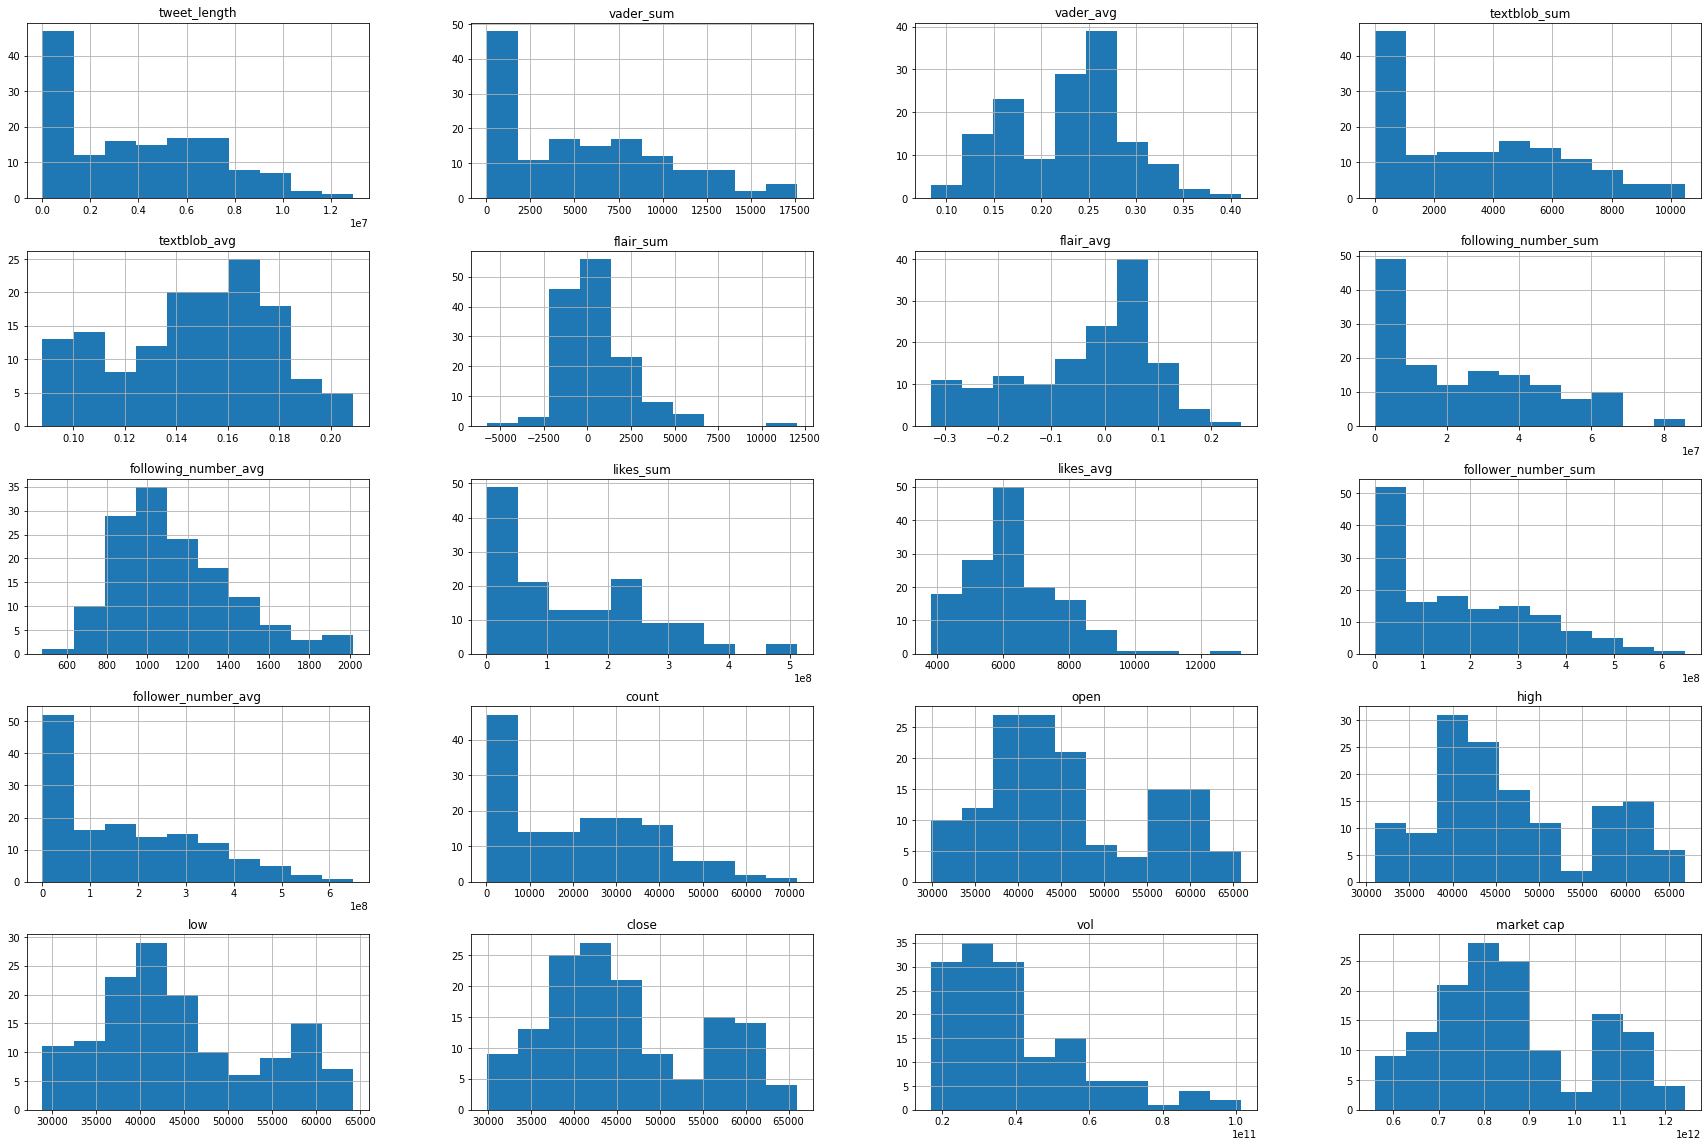

In [788]:
# 히스토그램
sentimental_daily_score_with_price.hist(figsize=(30,20))

In [789]:
target_date =[]
length = sentimental_daily_score_with_price.shape[0]
for i in tqdm.notebook.tqdm(range(length)):
    date=sentimental_daily_score_with_price.iloc[i]['date']
    year = int(date[:4])
    month = int(date[5:7])
    day = int(date[8:])+1
    if day >= 29 : 
        if month == 2 : 
            if ((year%4 == 0 and year%100 != 0) or year%400 == 0):
                day-=29
                month+=1
            else : 
                day-=28
                month+=1
        elif month in [1,3,5,7,8,10] and day>= 32: 
            month+=1
            day-=31
        elif month in [4,6,9,11] and day>=31:
            month+=1
            day-=30
        elif month ==12 and day>= 32: 
            month=1
            day-=31
    if day < 10 :
        day = '0'+str(day)
    if month < 10 : 
        month = '0'+str(month)
        
    new_date = str(year)+'-'+str(month)+'-'+str(day)
    target_date.append(new_date)
sentimental_daily_score_with_price['target_date'] = target_date

  0%|          | 0/142 [00:00<?, ?it/s]

In [790]:
Coin_Target_Price = Coin_Price_data.rename(columns = {'date':'target_date',
                                                      'close' : 'target_close', 'open':'target_open',
                                                      'high':'target_high','low':'target_low',
                                                      'vol':'target_vol', 'market cap':'target_market cap'})
sentimental_daily_score_with_price = pd.merge(left = sentimental_daily_score_with_price , 
                                              right = Coin_Target_Price, 
                                              how = "inner", 
                                              on = ["target_date"])

In [791]:
sentimental_daily_score_with_price

date  tweet_length   vader_sum  vader_avg  textblob_sum  \
0    2021-02-05        213134    222.9392   0.131605    167.233746   
1    2021-02-06        403425    455.5990   0.138987    367.609877   
2    2021-02-07        387452    425.4468   0.140411    459.336674   
3    2021-02-08        684730    889.2517   0.157473    621.510419   
4    2021-02-09        541976    656.7246   0.150971    458.599611   
..          ...           ...         ...        ...           ...   
137  2022-04-18       9660900  12808.8651   0.240168   8932.723894   
138  2022-04-19      10288745  14930.9321   0.271511  10485.806196   
139  2022-04-20       1974219   2456.5260   0.225867   1888.231093   
140  2022-04-21       5487326   6488.9937   0.215933   4754.682582   
141  2022-04-22       7916800   9818.7842   0.242349   7081.481512   

     textblob_avg    flair_sum  flair_avg  following_number_sum  \
0        0.098721  -296.721865  -0.175160               2523660   
1        0.112145  -649.196150  -0.198046               3423146   
2        0.151596  -328.563964  -0.108437               3351646   
3        0.110060  -757.583258  -0.134157               5874791   
4        0.105425  -569.387056  -0.130894               4834293   
..            ...          ...        ...                   ...   
137      0.167490   161.422622   0.003027              61585142   
138      0.190679  2724.376764   0.049541              59138030   
139      0.173614   426.807181   0.039243              10940504   
140      0.158220  -665.718980  -0.022153              27903671   
141      0.174787  3641.654905   0.089884              33705076   

     following_number_avg  ...     close           vol    market cap  \
0             1489.763872  ...  38144.31  5.859807e+10  7.102668e+11   
1             1044.278829  ...  39266.01  7.132603e+10  7.311925e+11   
2             1106.153795  ...  38903.44  6.550064e+10  7.244788e+11   
3             1040.338410  ...  46196.46  1.014672e+11  8.603427e+11   
4             1111.331724  ...  46481.10  9.180985e+10  8.656830e+11   
..                    ...  ...       ...           ...           ...   
137           1154.728630  ...  40826.21  3.370518e+10  7.763306e+11   
138           1075.393330  ...  41502.75  2.530321e+10  7.892274e+11   
139           1005.930857  ...  41374.38  2.781953e+10  7.868284e+11   
140            928.543842  ...  40527.36  3.537279e+10  7.707623e+11   
141            831.915982  ...  39740.32  2.801172e+10  7.558276e+11   

     target_date  target_open  target_high  target_low  target_close  \
0     2021-02-06     38138.39     40846.55    38138.39      39266.01   
1     2021-02-07     39250.19     39621.84    37446.15      38903.44   
2     2021-02-08     38886.83     46203.93    38076.32      46196.46   
3     2021-02-09     46184.99     48003.72    45166.96      46481.10   
4     2021-02-10     46469.76     47145.57    43881.15      44918.18   
..           ...          ...          ...         ...           ...   
137   2022-04-19     40828.17     41672.96    40618.63      41502.75   
138   2022-04-20     41501.74     42126.30    40961.10      41374.38   
139   2022-04-21     41371.52     42893.58    40063.83      40527.36   
140   2022-04-22     40525.86     40777.76    39315.42      39740.32   
141   2022-04-23     39738.72     39935.86    39352.20      39486.73   

       target_vol  target_market cap  
0    7.132603e+10       7.311925e+11  
1    6.550064e+10       7.244788e+11  
2    1.014672e+11       8.603427e+11  
3    9.180985e+10       8.656830e+11  
4    8.730109e+10       8.366169e+11  
..            ...                ...  
137  2.530321e+10       7.892274e+11  
138  2.781953e+10       7.868284e+11  
139  3.537279e+10       7.707623e+11  
140  2.801172e+10       7.558276e+11  
141  1.613802e+10       7.510455e+11  

[142 rows x 28 columns]

In [792]:
sentimental_daily_score_with_price.describe()

tweet_length     vader_sum   vader_avg  textblob_sum  textblob_avg  \
count  1.420000e+02    142.000000  142.000000    142.000000    142.000000   
mean   3.942804e+06   5406.506395    0.226713   3442.087088      0.147266   
std    3.153889e+06   4631.521882    0.061957   2875.837120      0.030308   
min    1.634100e+04     12.434100    0.083448      8.652864      0.088061   
25%    8.486530e+05    718.179175    0.169103    539.580558      0.127214   
50%    3.661714e+06   4597.118900    0.241028   3092.294717      0.151106   
75%    6.332522e+06   8716.287575    0.267522   5468.256290      0.169626   
max    1.290949e+07  17635.771400    0.411100  10485.806196      0.208541   

          flair_sum   flair_avg  following_number_sum  following_number_avg  \
count    142.000000  142.000000          1.420000e+02            142.000000   
mean     489.369890   -0.039926          2.531344e+07           1135.128694   
std     2088.062971    0.128017          2.149969e+07            288.794648   
min    -5790.905669   -0.326216          6.231400e+04            481.124424   
25%     -737.075994   -0.133341          4.658848e+06            919.739799   
50%      -52.353693   -0.008372          2.025477e+07           1080.595332   
75%     1330.894518    0.047927          4.188561e+07           1296.320478   
max    12045.121079    0.256045          8.602910e+07           2016.748358   

          likes_sum  ...           low         close           vol  \
count  1.420000e+02  ...    142.000000    142.000000  1.420000e+02   
mean   1.405788e+08  ...  44488.234296  45800.240845  3.985383e+10   
std    1.198139e+08  ...   9103.381643   9178.808957  1.814046e+10   
min    6.938360e+05  ...  28893.620000  29807.350000  1.683315e+10   
25%    2.752604e+07  ...  38156.705000  39679.307500  2.626691e+10   
50%    1.158987e+08  ...  42510.010000  43936.610000  3.514120e+10   
75%    2.226777e+08  ...  50848.912500  53117.887500  4.743215e+10   
max    5.125399e+08  ...  64180.490000  65992.840000  1.014672e+11   

         market cap   target_open   target_high    target_low  target_close  \
count  1.420000e+02    142.000000    142.000000    142.000000    142.000000   
mean   8.618072e+11  45817.500000  47085.548451  44586.157183  45984.384648   
std    1.716606e+11   9204.759931   9311.613784   9015.273044   9207.697892   
min    5.592443e+11  29796.290000  31006.190000  28893.620000  29807.350000   
25%    7.490617e+11  39678.487500  40669.700000  38472.060000  39722.792500   
50%    8.325993e+11  43931.135000  44678.540000  42697.600000  43961.395000   
75%    9.973853e+11  53237.275000  55048.177500  50139.177500  51595.115000   
max    1.243927e+12  66002.230000  66930.390000  63610.670000  65992.840000   

         target_vol  target_market cap  
count  1.420000e+02       1.420000e+02  
mean   3.950717e+10       8.652901e+11  
std    1.914326e+10       1.721112e+11  
min    1.373656e+10       5.592443e+11  
25%    2.603806e+10       7.509970e+11  
50%    3.352298e+10       8.342378e+11  
75%    4.630789e+10       9.642592e+11  
max    1.061025e+11       1.243927e+12  

[8 rows x 26 columns]

In [793]:
sentimental_daily_score_with_price.corr()

tweet_length  vader_sum  vader_avg  textblob_sum  \
tweet_length              1.000000   0.970147   0.578941      0.988489   
vader_sum                 0.970147   1.000000   0.689581      0.983195   
vader_avg                 0.578941   0.689581   1.000000      0.625313   
textblob_sum              0.988489   0.983195   0.625313      1.000000   
textblob_avg              0.620107   0.680152   0.877597      0.683523   
flair_sum                 0.468003   0.617279   0.665373      0.546301   
flair_avg                 0.640072   0.700272   0.870066      0.675718   
following_number_sum      0.940010   0.938028   0.570389      0.949801   
following_number_avg      0.214827   0.268235   0.299237      0.263568   
likes_sum                 0.952198   0.923717   0.518072      0.950254   
likes_avg                 0.208595   0.219137   0.197316      0.236991   
follower_number_sum       0.920455   0.900658   0.507121      0.918693   
follower_number_avg       0.920455   0.900658   0.507121      0.918693   
count                     0.996341   0.961633   0.549137      0.983353   
open                     -0.015766   0.040644  -0.014309     -0.024919   
high                     -0.018879   0.040517  -0.024155     -0.028565   
low                      -0.009370   0.055983   0.027206     -0.013357   
close                    -0.023026   0.043341  -0.000265     -0.029127   
vol                      -0.406369  -0.412890  -0.555999     -0.417241   
market cap               -0.006741   0.058018   0.013801     -0.013927   
target_open              -0.022192   0.044720   0.002438     -0.027720   
target_high              -0.043516   0.022818  -0.024500     -0.049699   
target_low                0.009814   0.074085   0.017858      0.003601   
target_close             -0.018919   0.044926  -0.017237     -0.025453   
target_vol               -0.492962  -0.474858  -0.483946     -0.487822   
target_market cap        -0.002526   0.059723  -0.003191     -0.010164   

                      textblob_avg  flair_sum  flair_avg  \
tweet_length              0.620107   0.468003   0.640072   
vader_sum                 0.680152   0.617279   0.700272   
vader_avg                 0.877597   0.665373   0.870066   
textblob_sum              0.683523   0.546301   0.675718   
textblob_avg              1.000000   0.597120   0.863529   
flair_sum                 0.597120   1.000000   0.707044   
flair_avg                 0.863529   0.707044   1.000000   
following_number_sum      0.613189   0.467786   0.621203   
following_number_avg      0.352961   0.219719   0.326112   
likes_sum                 0.574273   0.421576   0.603234   
likes_avg                 0.287545   0.158180   0.340345   
follower_number_sum       0.555902   0.395975   0.580748   
follower_number_avg       0.555902   0.395975   0.580748   
count                     0.591801   0.439680   0.624690   
open                     -0.191953   0.079537  -0.145075   
high                     -0.213309   0.085489  -0.146459   
low                      -0.153552   0.126200  -0.097123   
close                    -0.192537   0.111229  -0.121411   
vol                      -0.612199  -0.320147  -0.589388   
market cap               -0.177347   0.118265  -0.104991   
target_open              -0.189578   0.114062  -0.119321   
target_high              -0.214611   0.094309  -0.136175   
target_low               -0.162420   0.125199  -0.086824   
target_close             -0.198546   0.101872  -0.115863   
target_vol               -0.544392  -0.290907  -0.545489   
target_market cap        -0.183502   0.108913  -0.099517   

                      following_number_sum  following_number_avg  likes_sum  \
tweet_length                      0.940010              0.214827   0.952198   
vader_sum                         0.938028              0.268235   0.923717   
vader_avg                         0.570389              0.299237   0.518072   
textblob_sum                      0.949801              0.263568   0.950254   
textblo

In [794]:
# 상관관계 조사
corr = sentimental_daily_score_with_price.corr()
corr[['vader_sum', 'vader_avg','textblob_sum', 'textblob_avg','flair_sum','flair_avg']].loc[['target_open',
                                                                                             'target_close',
                                                                                             'target_high',
                                                                                             'target_low',
                                                                                             'target_vol',
                                                                                             'target_market cap'
                                                                                            ]]

vader_sum  vader_avg  textblob_sum  textblob_avg  \
target_open         0.044720   0.002438     -0.027720     -0.189578   
target_close        0.044926  -0.017237     -0.025453     -0.198546   
target_high         0.022818  -0.024500     -0.049699     -0.214611   
target_low          0.074085   0.017858      0.003601     -0.162420   
target_vol         -0.474858  -0.483946     -0.487822     -0.544392   
target_market cap   0.059723  -0.003191     -0.010164     -0.183502   

                   flair_sum  flair_avg  
target_open         0.114062  -0.119321  
target_close        0.101872  -0.115863  
target_high         0.094309  -0.136175  
target_low          0.125199  -0.086824  
target_vol         -0.290907  -0.545489  
target_market cap   0.108913  -0.099517

<AxesSubplot:>

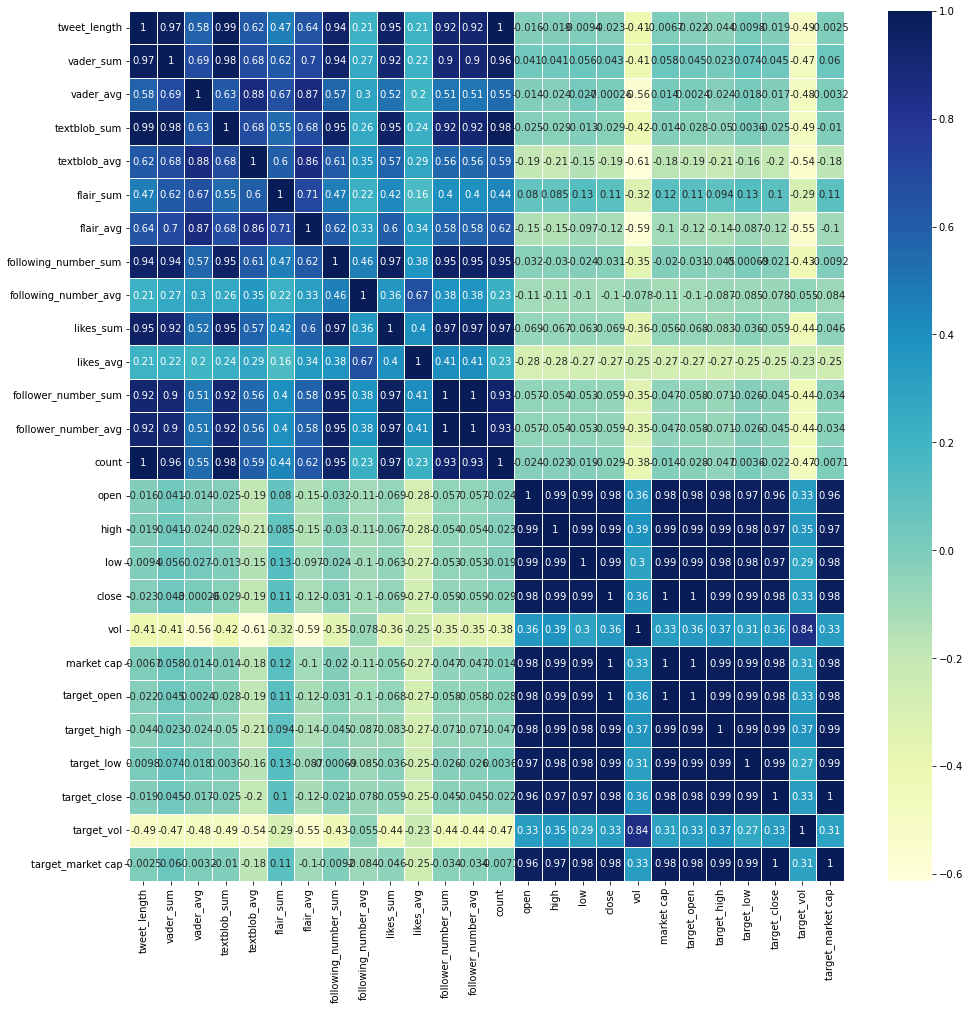

In [795]:
# 선형성 확인
plt.figure(figsize=(16,16))
sns.heatmap(sentimental_daily_score_with_price.corr(), linewidths=.5, cmap = 'YlGnBu', annot=True)

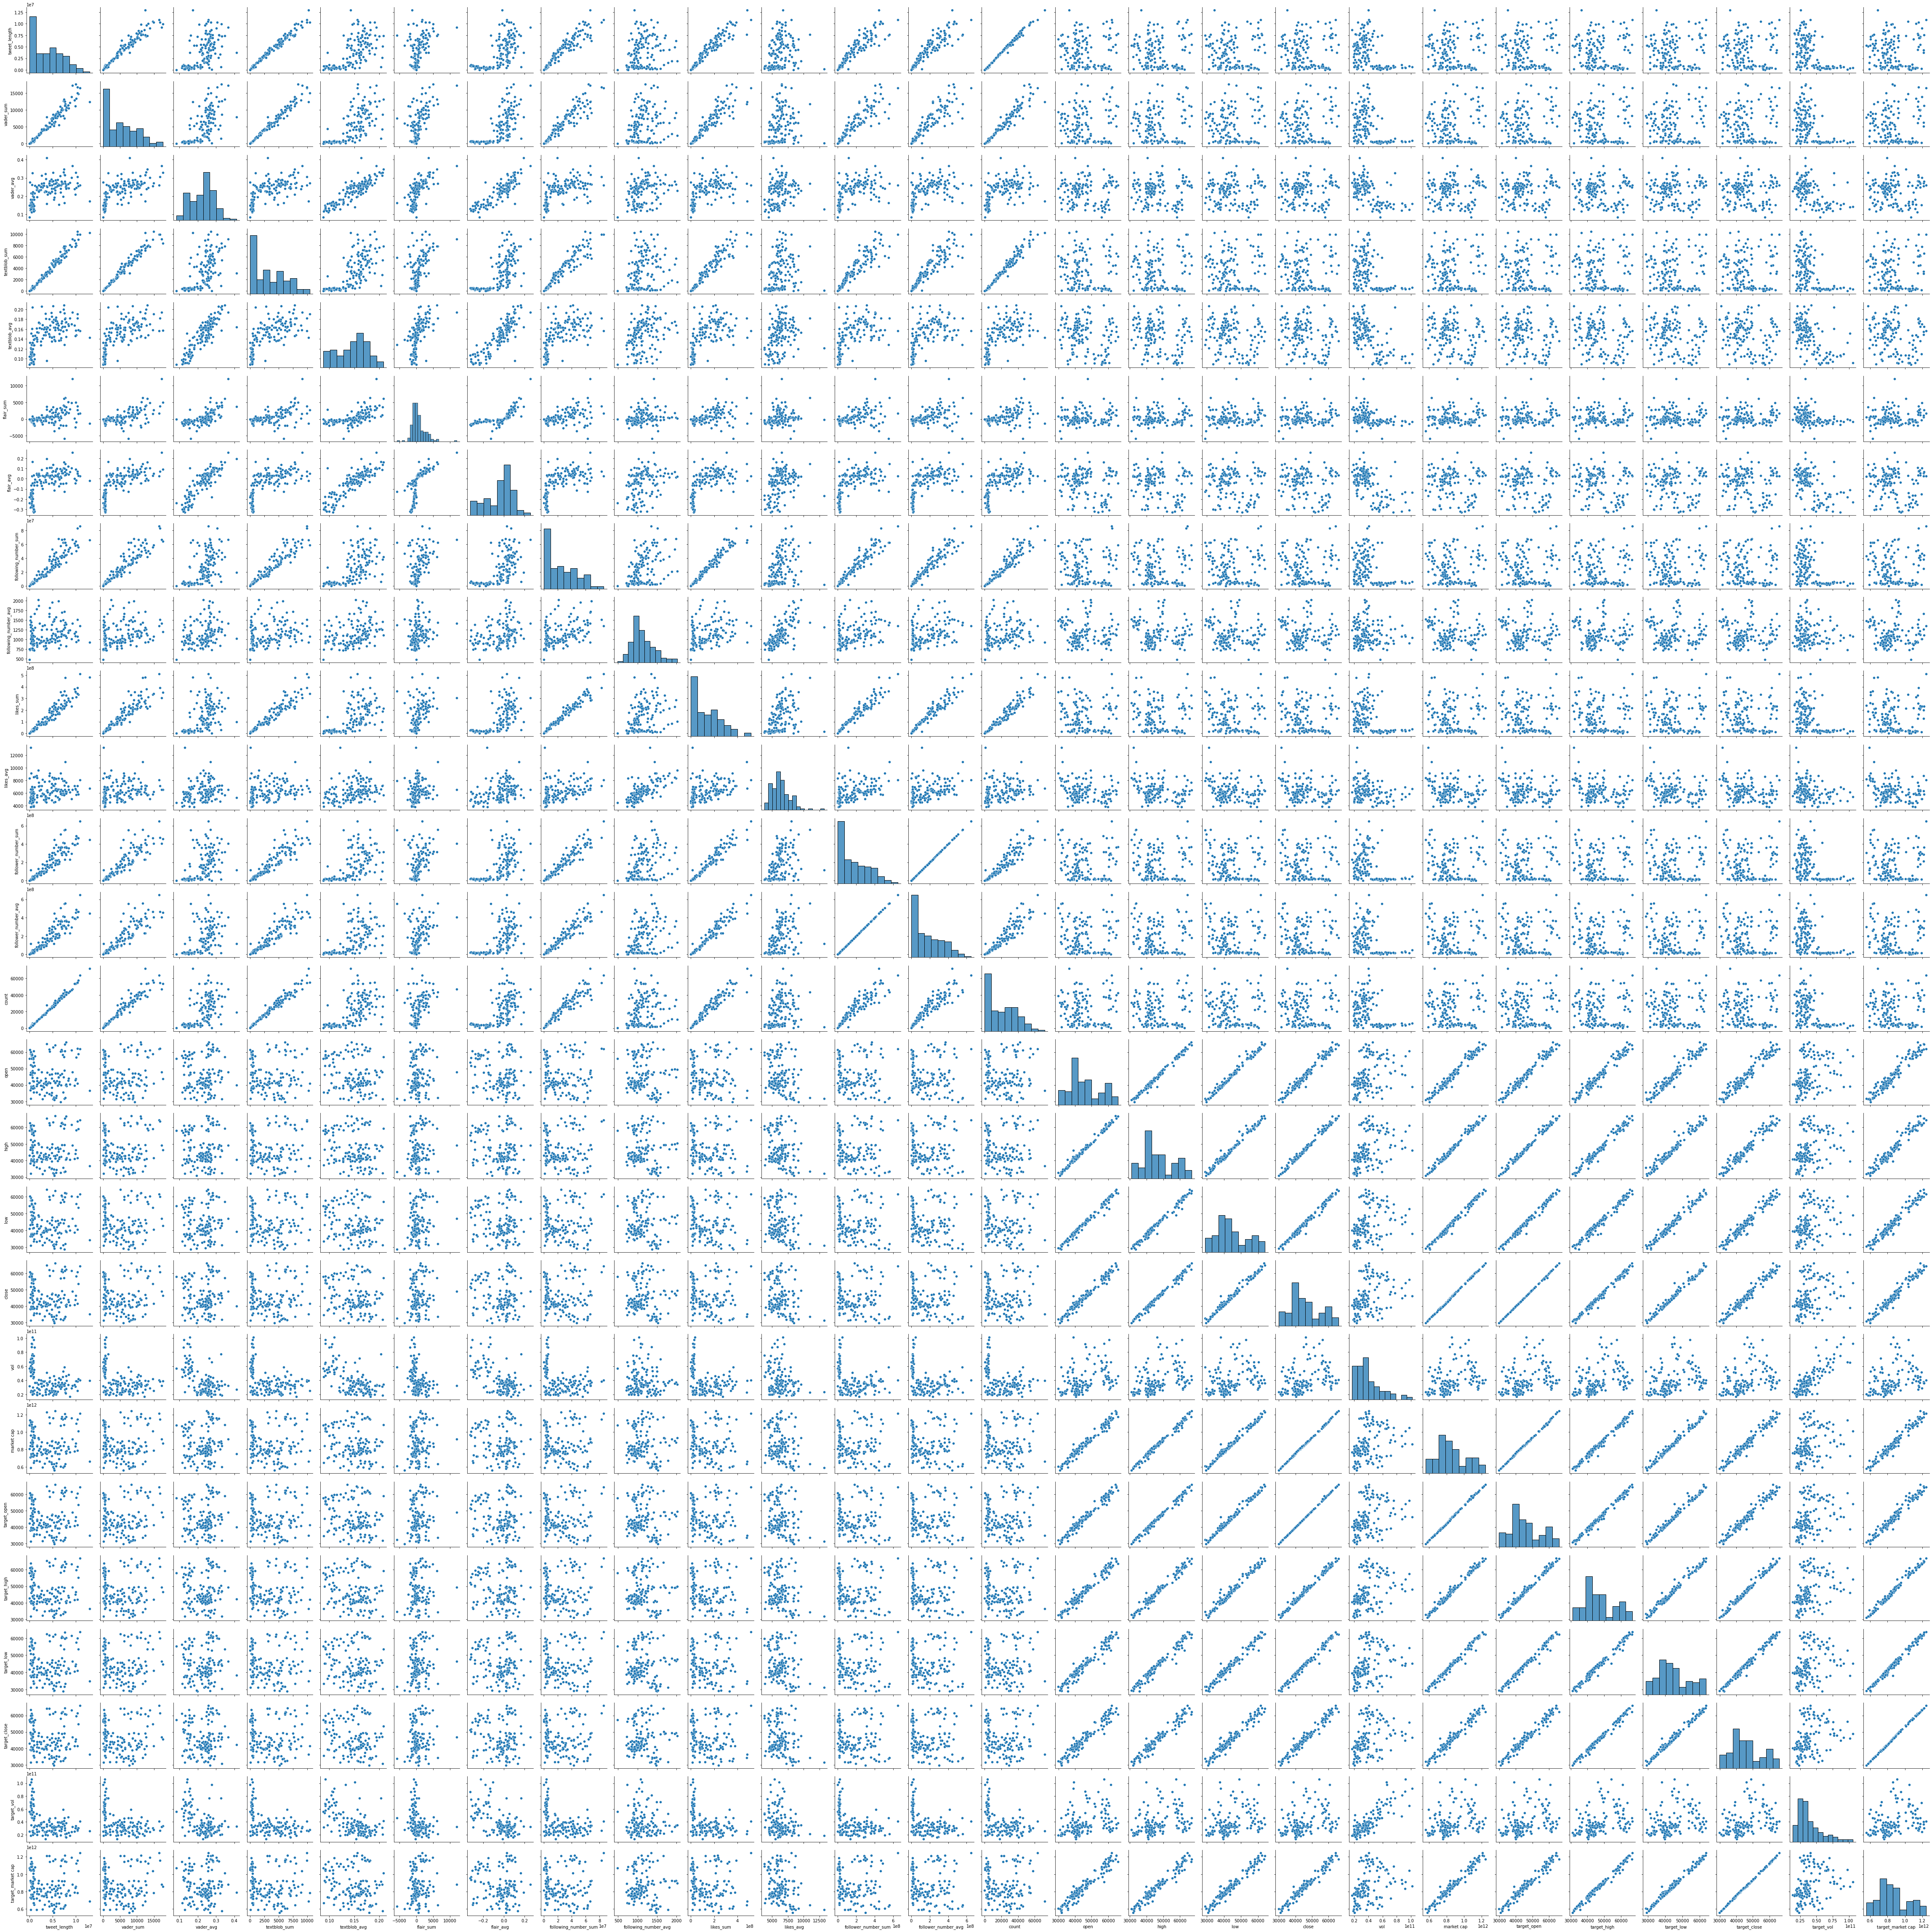

In [796]:
sns.pairplot(sentimental_daily_score_with_price, palette='blue')
plt.show()

In [797]:
# 정규화
normed_sentimental_daily_score_with_price = (sentimental_daily_score_with_price- sentimental_daily_score_with_price.mean())/sentimental_daily_score_with_price.std()
normed_sentimental_daily_score_with_price = pd.merge(normed_sentimental_daily_score_with_price.drop('date',axis=1),
                                  sentimental_daily_score_with_price['date'], left_index = True, right_index=True)
normed_sentimental_daily_score_with_price.drop(['target_date'],axis=1,inplace=True)
normed_sentimental_daily_score_with_price

/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_40902/964358493.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normed_sentimental_daily_score_with_price = (sentimental_daily_score_with_price- sentimental_daily_score_with_price.mean())/sentimental_daily_score_with_price.std()


close     count  flair_avg  flair_sum  follower_number_avg  \
0   -0.834088 -1.162789  -1.056379  -0.376469            -1.072859   
1   -0.711882 -1.068993  -1.235151  -0.545274            -1.015768   
2   -0.751383 -1.083678  -0.535172  -0.391719            -1.045025   
3    0.043167 -0.928713  -0.736080  -0.597182            -0.812995   
4    0.074177 -1.005514  -0.710590  -0.507052            -0.917393   
..        ...       ...        ...        ...                  ...   
137 -0.541904  1.894998   0.335520  -0.157058             1.384053   
138 -0.468197  1.993235   0.698866   1.070373             1.490971   
139 -0.482182 -0.619079   0.618422  -0.029962            -0.579661   
140 -0.574462  0.516362   0.138831  -0.553187             0.701472   
141 -0.660208  1.135984   1.014002   1.509670             0.682591   

     follower_number_sum  following_number_avg  following_number_sum  \
0              -1.072859              1.227984             -1.060005   
1              -1.015768             -0.314583             -1.018168   
2              -1.045025             -0.100330             -1.021493   
3              -0.812995             -0.328227             -0.904136   
4              -0.917393             -0.082401             -0.952532   
..                   ...                   ...                   ...   
137             1.384053              0.067868              1.687080   
138             1.490971             -0.206844              1.573259   
139            -0.579661             -0.447369             -0.668518   
140             0.701472             -0.715335              0.120478   
141             0.682591             -1.049925              0.390314   

         high  likes_avg  ...  target_market cap  target_open  target_vol  \
0   -0.927379  -0.137619  ...          -0.779133    -0.834254    1.662144   
1   -0.649014  -0.338438  ...          -0.818141    -0.713469    1.357839   
2   -0.779103  -0.147790  ...          -0.028745    -0.752944    3.236651   
3   -0.079952   0.256561  ...           0.002283     0.039924    2.732172   
4    0.111223   0.417199  ...          -0.166597     0.070861    2.496644   
..        ...        ...  ...                ...          ...         ...   
137 -0.634168   0.533864  ...          -0.441939    -0.542038   -0.741982   
138 -0.561233  -0.093481  ...          -0.455878    -0.468862   -0.610535   
139 -0.513079   0.493986  ...          -0.549225    -0.483009   -0.215970   
140 -0.431578   0.770656  ...          -0.635999    -0.574881   -0.600496   
141 -0.656321  -0.251908  ...          -0.663784    -0.660395   -1.220750   

     textblob_avg  textblob_sum  tweet_length  vader_avg  vader_sum       vol  \
0       -1.601728     -1.138748     -1.182562  -1.535078  -1.119193  1.033283   
1       -1.158831     -1.069072     -1.122227  -1.415935  -1.068959  1.734918   
2        0.142859     -1.037176     -1.127292  -1.392941  -1.075469  1.413791   
3       -1.227601     -0.980785     -1.033034  -1.117558  -0.975328  3.396462   
4       -1.380534     -1.037433     -1.078297  -1.222505  -1.025534  2.864096   
..            ...           ...           ...        ...        ...       ...   
137      0.667252      1.909231      1.813030   0.217156   1.598256 -0.338946   
138      1.432367      2.449276      2.012100   0.723046   2.056435 -0.802109   
139      0.869339     -0.540314     -0.624177  -0.013668  -0.636935 -0.663395   
140      0.361420      0.456422      0.489720  -0.174005   0.233722 -0.247019   
141      0.908015      1.265508      1.260030   0.252368   0.952663 -0.652801   

           date  
0    2021-02-05  
1    2021-02-06  
2    2021-02-07  
3    2021-02-08  
4    2021-02-09  
..          ...  
137  2022-04-18  
138  2022-04-19  
139  2022-04-20  
140  2022-04-21  
141  2022-04-22  

[142 rows x 27 columns]

array([[<AxesSubplot:title={'center':'close'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'flair_avg'}>,
        <AxesSubplot:title={'center':'flair_sum'}>,
        <AxesSubplot:title={'center':'follower_number_avg'}>],
       [<AxesSubplot:title={'center':'follower_number_sum'}>,
        <AxesSubplot:title={'center':'following_number_avg'}>,
        <AxesSubplot:title={'center':'following_number_sum'}>,
        <AxesSubplot:title={'center':'high'}>,
        <AxesSubplot:title={'center':'likes_avg'}>],
       [<AxesSubplot:title={'center':'likes_sum'}>,
        <AxesSubplot:title={'center':'low'}>,
        <AxesSubplot:title={'center':'market cap'}>,
        <AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'target_close'}>],
       [<AxesSubplot:title={'center':'target_high'}>,
        <AxesSubplot:title={'center':'target_low'}>,
        <AxesSubplot:title={'center':'target_market cap'}>,
        <AxesSubplot:title={

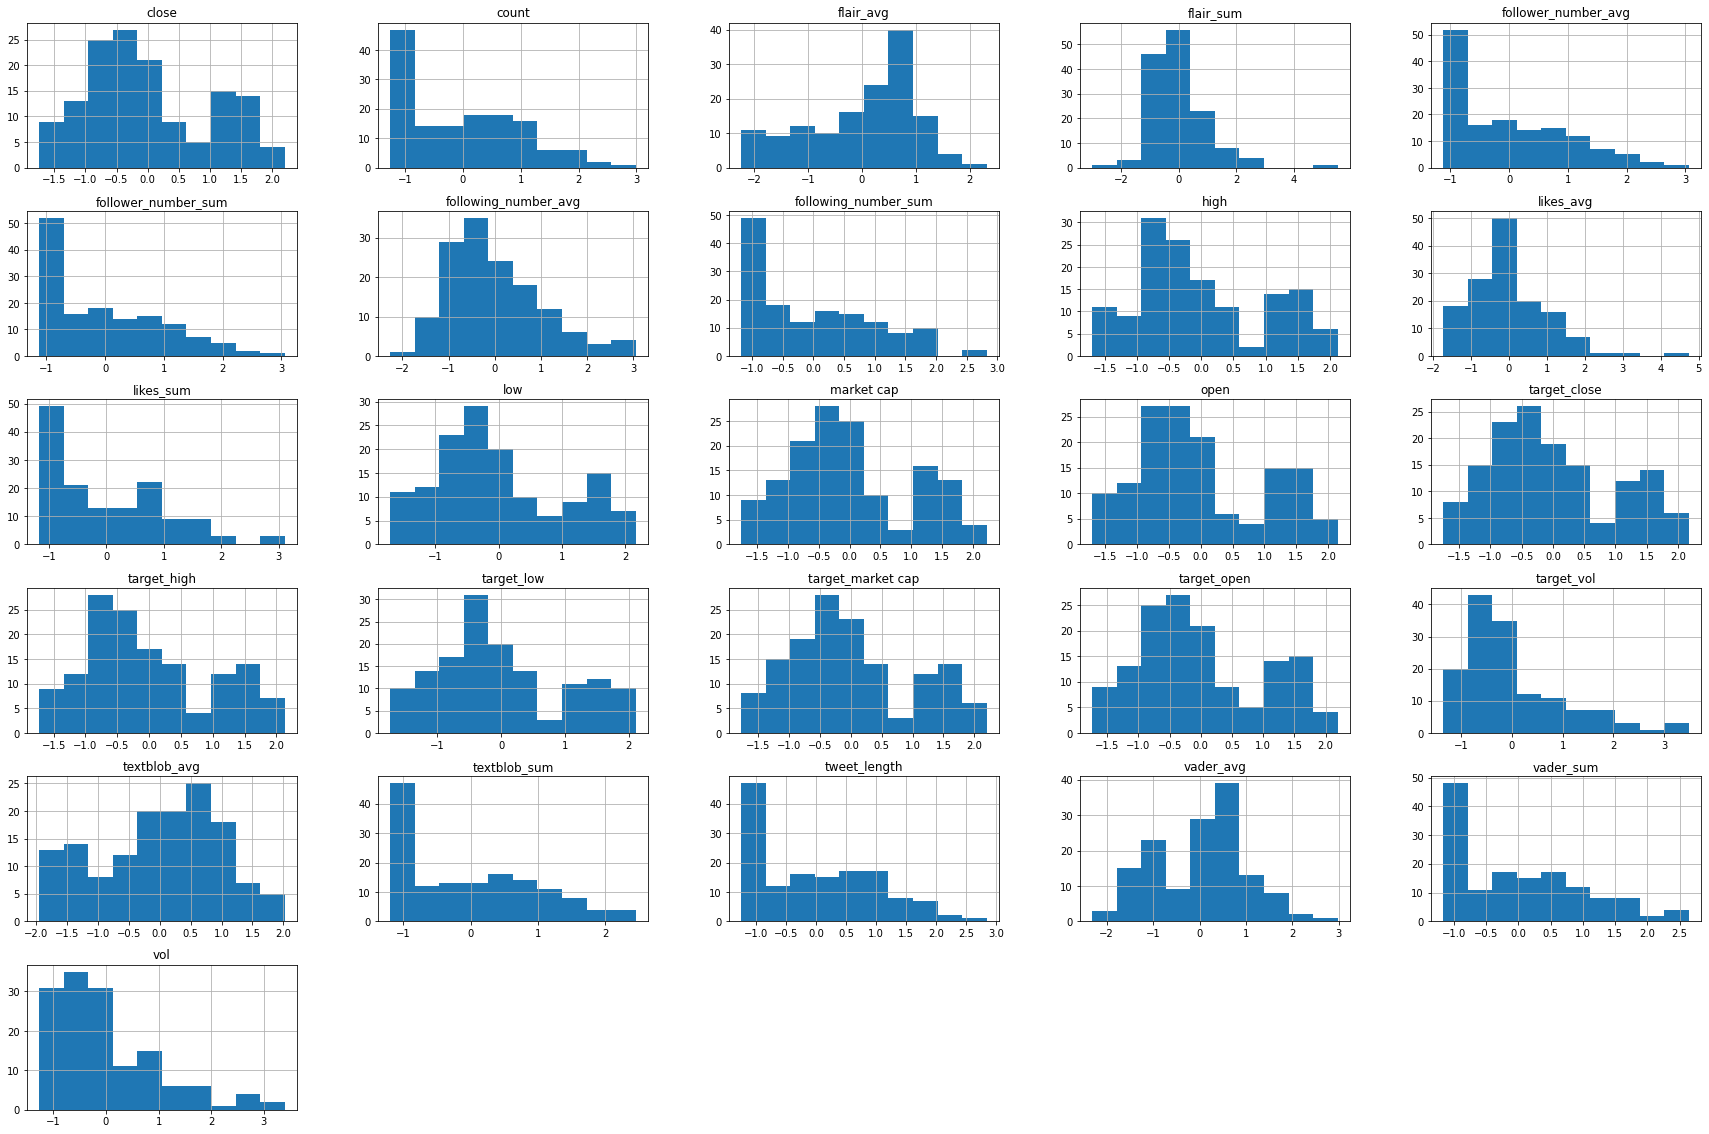

In [798]:
normed_sentimental_daily_score_with_price.hist(figsize=(30,20))

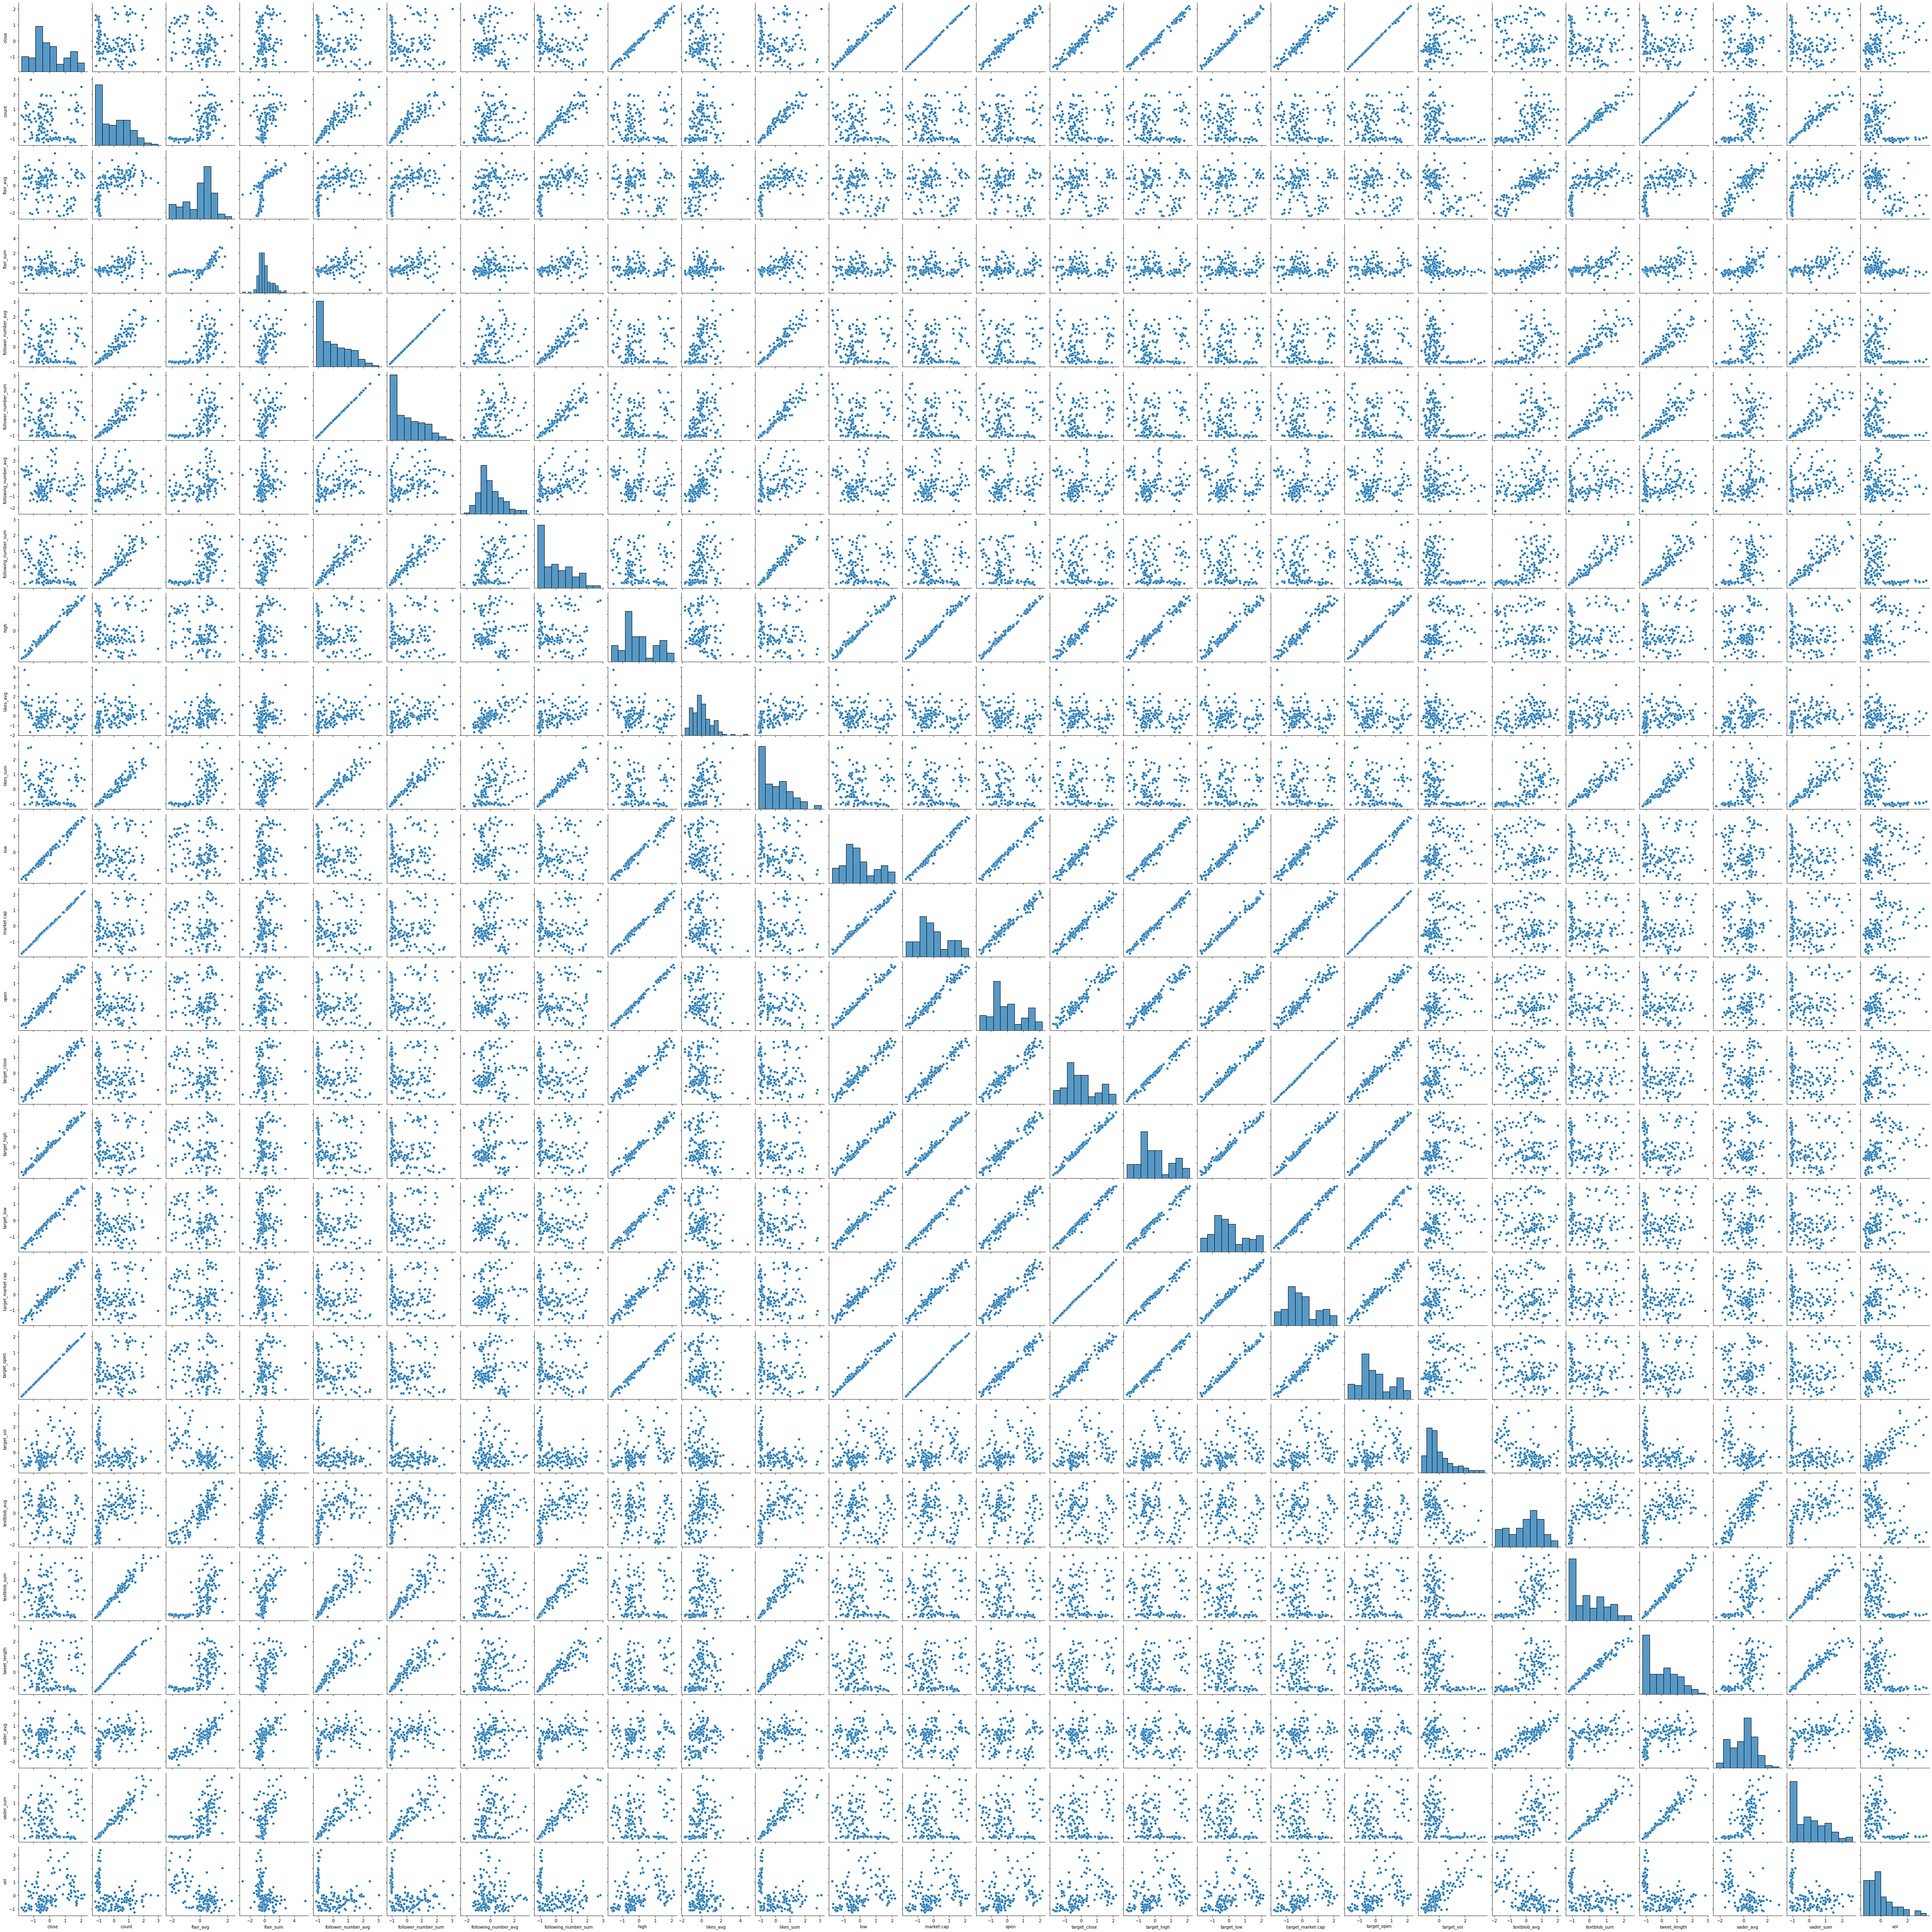

In [799]:
sns.pairplot(normed_sentimental_daily_score_with_price, palette='blue')
plt.show()

In [800]:
normed_sentimental_daily_score_with_price.corr()

close     count  flair_avg  flair_sum  \
close                 1.000000 -0.028851  -0.121411   0.111229   
count                -0.028851  1.000000   0.624690   0.439680   
flair_avg            -0.121411  0.624690   1.000000   0.707044   
flair_sum             0.111229  0.439680   0.707044   1.000000   
follower_number_avg  -0.058619  0.934156   0.580748   0.395975   
follower_number_sum  -0.058619  0.934156   0.580748   0.395975   
following_number_avg -0.102954  0.227186   0.326112   0.219719   
following_number_sum -0.031387  0.948189   0.621203   0.467786   
high                  0.992851 -0.023352  -0.146459   0.085489   
likes_avg            -0.270865  0.227608   0.340345   0.158180   
likes_sum            -0.068569  0.965535   0.603234   0.421576   
low                   0.991704 -0.018646  -0.097123   0.126200   
market cap            0.999493 -0.013578  -0.104991   0.118265   
open                  0.983224 -0.023543  -0.145075   0.079537   
target_close          0.981228 -0.022438  -0.115863   0.101872   
target_high           0.991939 -0.047309  -0.136175   0.094309   
target_low            0.989194  0.003579  -0.086824   0.125199   
target_market cap     0.981296 -0.007052  -0.099517   0.108913   
target_open           0.999848 -0.028182  -0.119321   0.114062   
target_vol            0.332803 -0.471043  -0.545489  -0.290907   
textblob_avg         -0.192537  0.591801   0.863529   0.597120   
textblob_sum         -0.029127  0.983353   0.675718   0.546301   
tweet_length         -0.023026  0.996341   0.640072   0.468003   
vader_avg            -0.000265  0.549137   0.870066   0.665373   
vader_sum             0.043341  0.961633   0.700272   0.617279   
vol                   0.356662 -0.378150  -0.589388  -0.320147   

                      follower_number_avg  follower_number_sum  \
close                           -0.058619            -0.058619   
count                            0.934156             0.934156   
flair_avg                        0.580748             0.580748   
flair_sum                        0.395975             0.395975   
follower_number_avg              1.000000             1.000000   
follower_number_sum              1.000000             1.000000   
following_number_avg             0.377316             0.377316   
following_number_sum             0.954857             0.954857   
high                            -0.054037            -0.054037   
likes_avg                        0.409148             0.409148   
likes_sum                        0.967761             0.967761   
low                             -0.053065            -0.053065   
market cap                      -0.047454            -0.047454   
open                            -0.057020            -0.057020   
target_close                    -0.045253            -0.045253   
target_high                     -0.070950            -0.070950   
target_low                      -0.025679            -0.025679   
target_market cap               -0.033950            -0.033950   
target_open                     -0.058002            -0.058002   
target_vol                      -0.440549            -0.440549   
textblob_avg                     0.555902             0.555902   
textblob_sum                     0.918693             0.918693   
tweet_length                     0.920455             0.920455   
vader_avg                        0.507121             0.507121   
vader_sum                        0.900658             0.900658   
vol                             -0.346396            -0.346396   

                      following_number_avg  following_number_sum      high  \
close                            -0.102954             -0.031387  0.992851   
count                             0.227186              0.948189 -0.023352   
flair_avg                         0.326112              0.621203 -0.146459   
flair_sum                         0.219719              0.467786  0.085489   
follower_number_avg               0.377316              0.954857 -0.0

In [801]:
# 상관관계 조사
normed_corr = normed_sentimental_daily_score_with_price.corr()
normed_corr[['vader_sum', 'vader_avg','textblob_sum', 'textblob_avg','flair_sum','flair_avg']].loc[['target_open',
                                                                                             'target_close',
                                                                                             'target_high',
                                                                                             'target_low',
                                                                                             'target_vol',
                                                                                             'target_market cap'
                                                                                            ]]

vader_sum  vader_avg  textblob_sum  textblob_avg  \
target_open         0.044720   0.002438     -0.027720     -0.189578   
target_close        0.044926  -0.017237     -0.025453     -0.198546   
target_high         0.022818  -0.024500     -0.049699     -0.214611   
target_low          0.074085   0.017858      0.003601     -0.162420   
target_vol         -0.474858  -0.483946     -0.487822     -0.544392   
target_market cap   0.059723  -0.003191     -0.010164     -0.183502   

                   flair_sum  flair_avg  
target_open         0.114062  -0.119321  
target_close        0.101872  -0.115863  
target_high         0.094309  -0.136175  
target_low          0.125199  -0.086824  
target_vol         -0.290907  -0.545489  
target_market cap   0.108913  -0.099517

## 데이터 모델링 ( Target  : 'target_close')

In [1035]:
twitter_dataset.to_csv('twitter_dataset.csv')

In [859]:
twitter_dataset = normed_sentimental_daily_score_with_price

In [981]:
y_target = twitter_dataset['target_close']
x_data= twitter_dataset.drop(['target_close','date','target_open','target_high','target_low',
                              'target_vol','follower_number_avg','follower_number_sum','target_market cap',
                             'tweet_length','count','market cap','likes_avg','open','low','high',
                             'textblob_sum','vol','following_number_avg' ,'likes_sum','flair_sum','vader_sum'
                             ,'textblob_avg','following_number_sum'],axis=1)
'''
'market cap', 'textblob_avg',
                              'textblob_sum', 
                              'likes_avg',
'vader_sum','vol'
'''

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x_data, y_target, train_size=0.8, test_size=0.2,random_state = 2)

In [982]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(113, 3) (29, 3) (113,) (29,)


In [983]:
train_y.shape

(113,)

In [984]:
test_x=sm.add_constant(test_x,has_constant='add')
train_x=sm.add_constant(train_x,has_constant='add')
model1 = sm.OLS(train_y, train_x)
fitted_model1 = model1.fit()

In [985]:
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           target_close   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1108.
Date:                Thu, 19 May 2022   Prob (F-statistic):           1.86e-81
Time:                        22:53:23   Log-Likelihood:                 33.942
No. Observations:                 113   AIC:                            -59.88
Df Residuals:                     109   BIC:                            -48.97
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0182      0.017     -1.061      0.291      -0.052       0.016
close          1.0000      0.018     56.595      0.000       0.965       1.035
flair_avg      0.0569      0.035      1.604      0.112      -0.013       0.127
vader_avg     -0.0468      0.035     -1.328      0.187      -0.117       0.023
==============================================================================
Omnibus:                        7.664   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.059
Skew:                          -0.459   Prob(JB):                       0.0178
Kurtosis:                       3.933   Cond. No.                         4.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [986]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

VIF Factor   features
0    1.064323      close
1    4.380182  flair_avg
2    4.315615  vader_avg

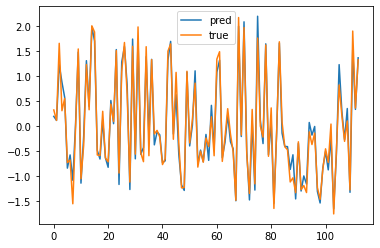

In [987]:
plt.plot(np.array(fitted_model1.predict(train_x)),label="pred")
plt.plot(np.array(train_y),label="true")
plt.legend()
plt.show()

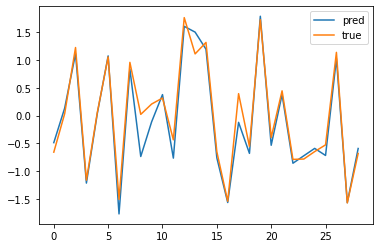

In [988]:
plt.plot(np.array(fitted_model1.predict(test_x)),label="pred")
plt.plot(np.array(test_y),label="true")
plt.legend()
plt.show()

In [989]:
vader_textblob_bitcoin_test_data = pd.read_csv('vader_textblob_bitcoin_test_data').drop('Unnamed: 0',axis=1)
flair_bitcoin_test_data = pd.read_csv('flair_bitcoin_test_data.csv').drop('Unnamed: 0',axis=1)
bitcoin_test_data = pd.read_csv('bitcoin_test_data').drop('Unnamed: 0',axis=1)

/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_40902/1650357391.py:3: DtypeWarning: Columns (2,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  bitcoin_test_data = pd.read_csv('bitcoin_test_data').drop('Unnamed: 0',axis=1)


In [990]:
print(bitcoin_test_data.shape)
print(flair_bitcoin_test_data.shape)
print(vader_textblob_bitcoin_test_data.shape)

(283769, 9)
(283769, 4)
(283769, 5)


In [991]:
bitcoin_test_data = pd.merge(left = bitcoin_test_data, 
                             right = vader_textblob_bitcoin_test_data.drop(['tweet','date'],axis=1), 
                             left_index = True,right_index=True)

In [992]:
bitcoin_test_data = pd.merge(left = bitcoin_test_data, 
                             right = flair_bitcoin_test_data.drop(['tweet','date'],axis=1), 
                             how = 'inner',
                             left_index = True,right_index=True)

In [993]:
bitcoin_test_data.shape

(283769, 14)

In [994]:
bitcoin_test_data

date              user_id  \
0       2022-04-28 13:49:42+00:00  1119277376108683264   
1       2022-04-28 13:49:46+00:00            385649270   
2       2022-04-28 13:49:46+00:00           3316713321   
3       2022-04-28 13:49:56+00:00            385649270   
4       2022-04-28 13:50:11+00:00           2540531252   
...                           ...                  ...   
283764  2022-05-14 23:58:33+00:00  1508570037719900162   
283765  2022-05-14 23:58:56+00:00           4659283877   
283766  2022-05-14 23:59:16+00:00            259957838   
283767  2022-05-14 23:59:48+00:00             23025079   
283768                       date              user_id   

                                 user_name  user_screen_name  \
0       ClankApp - Crypto Whales Tracker 🐳          ClankApp   
1                                     POLO          Polo_btc   
2                           ValenzuelaPost    ValenzuelaPost   
3                                     POLO          Polo_btc   
4                                    Doris         Doriskoh7   
...                                    ...               ...   
283764                          ₿itcoin 📉🐦    BitcoinMainCEO   
283765        DIAPORA PETER OBI CAMPAIGNER     2babaidibia76   
283766             BitcoinBilly the Beaver    ihaveinternet2   
283767                             Charles      cspratt15139   
283768                           user_name  user_screen_name   

                                                    tweet  retweets  likes  \
0       🚀 🚀3,484 #BTC (136,656,500 USD) move from unkn...       0.0    0.0   
1                                          @coinbureau 👍🏾       0.0    0.0   
2       Bitcoin (CRYPTO:BTC): Could it Crash to $10,00...       0.0    0.0   
3                                   @dickc Definitely not       0.0    0.0   
4       @BTC_for_Freedom I totally agree, cryptocurren...       0.0    1.0   
...                                                   ...       ...    ...   
283764  doesnt matter the person doesnt matter the gen...         0      0   
283765  @elonmusk Elon kindly assist with little btc t...         0      0   
283766  @JustWantToQ1 @Ocampo_jahaziel @UtterlyRekt @f...         0      0   
283767  $ach #buythedip $btc $eth $xrp $doge $icp $ect...         2      2   
283768                                              tweet  retweets  likes   

        follower_number  following_number  \
0               13504.0               5.0   
1                 663.0             333.0   
2                 165.0              58.0   
3                 663.0             333.0   
4                 514.0             321.0   
...                 ...               ...   
283764               56               302   
283765             1109              4954   
283766               19               131   
283767             2573               172   
283768  follower_number  following_number   

                                             clean_text_x   vader  textblob  \
0       3 484 ( 136 656 500 usd ) move from unknown wa...  0.0000 -0.100000   
1                                                     NaN  0.0000  0.000000   
2       bitcoin ( crypto btc ) could it crash to $ 10 ... -0.4019  0.000000   
3                                          definitely not  0.4019  0.000000   
4       _for_freedom i totally agree cryptocurrency is...  0.6582  0.227500   
...                                                   ...     ...       ...   
283764  doesnt matter the person doesnt matter the gen... -0.0382  0.250000   
283765  elon kindly assist with little btc to run my c...  0.6908  0.206250   
283766  _jahaziel what do you mean the new all time hi...  0.0000  0.120966   
283767  $ ach $ btc $ eth $ xrp $ doge $ icp $ ect $ s...  0.0000  0.000000   
283768                                              tweet  0.0000  0.000000   

                                             clean_text_y     flair  
0       3 484 ( 136 656 500 USD ) move from unknown wa... -0.99995

In [995]:
bitcoin_test_data.isna().sum()

date                    0
user_id                 0
user_name               0
user_screen_name        0
tweet                   0
retweets                0
likes                   0
follower_number         0
following_number        0
clean_text_x        10241
vader                   0
textblob                0
clean_text_y        10241
flair                   0
dtype: int64

In [996]:
#bitcoin_test_data = bitcoin_test_data.drop(['clean_text_x','clean_text_y'],axis=1)
bitcoin_test_data.shape

(283769, 14)

In [997]:
bitcoin_test_data.isna().sum()

date                    0
user_id                 0
user_name               0
user_screen_name        0
tweet                   0
retweets                0
likes                   0
follower_number         0
following_number        0
clean_text_x        10241
vader                   0
textblob                0
clean_text_y        10241
flair                   0
dtype: int64

In [998]:
bitcoin_test_data.dtypes

date                 object
user_id              object
user_name            object
user_screen_name     object
tweet                object
retweets             object
likes                object
follower_number      object
following_number     object
clean_text_x         object
vader               float64
textblob            float64
clean_text_y         object
flair               float64
dtype: object

In [999]:
n = bitcoin_test_data.shape[0]

In [1002]:
import tqdm
data_date = dict()

for i in tqdm.notebook.tqdm(range(n)):
    row = bitcoin_test_data.iloc[i]
    key = str(bitcoin_test_data.iloc[i]['date'][:10])
    if len(row['date']) ==25:
        if len(str(row['follower_number'])) <= 10 and len(str(row['following_number'])) <= 10 and len(str(row['likes'])) <= 10:
            if row['follower_number'] == 'False' : 
                row['follower_number'] =0 
            if row['following_number'] == 'False' : 
                row['following_number'] = 0
            if row['likes'] == 'False' : 
                row['likes'] =0 
            if key in data_date : 
                data_date[key][0] += len(row['tweet']) 
                data_date[key][1] += row['vader']
                data_date[key][2] += row['textblob']
                data_date[key][3] += 1
                data_date[key][4] += int(float(row['follower_number']))
                data_date[key][5] += int(float(row['following_number']))
                data_date[key][6] += int(float(row['likes']))
                data_date[key][7] += (row['flair'])
            else : 
                data_date[key] = [ len(row['tweet']), row['vader'], row['textblob'], 1, 
                                  int(float(row['follower_number'])),int(float(row['following_number'])),
                                int(float(row['likes'])),row['flair'] ]

  0%|          | 0/283769 [00:00<?, ?it/s]

In [1003]:
data_datelist = []
data_tweetlength = []
data_date_vader_sum = []
data_date_vader_avg = []
data_date_textblob_sum = []
data_date_textblob_avg = []
data_date_count = []
data_date_following_number_sum = []
data_date_following_number_avg = []
data_date_likes_sum = []
data_date_likes_avg = []
data_date_follower_number_sum = []
data_date_follower_number_avg = []
data_date_flair_sum = []
data_date_flair_avg = []

for key in tqdm.notebook.tqdm(data_date):
    data_datelist.append(key)
    data_tweetlength.append(data_date[key][0])
    data_date_vader_sum.append(data_date[key][1])
    data_date_vader_avg.append(data_date[key][1]/data_date[key][3])
    data_date_textblob_sum.append(data_date[key][2])
    data_date_textblob_avg.append(data_date[key][2]/data_date[key][3])
    data_date_flair_sum.append(data_date[key][7])
    data_date_flair_avg.append(data_date[key][7]/data_date[key][3])
    data_date_follower_number_sum.append(data_date[key][4])
    data_date_follower_number_avg.append(data_date[key][4]/data_date[key][3])
    data_date_following_number_sum.append(data_date[key][5])
    data_date_following_number_avg.append(data_date[key][5]/data_date[key][3])
    data_date_likes_sum.append(data_date[key][6])
    data_date_likes_avg.append(data_date[key][6]/data_date[key][3])
    data_date_count.append(data_date[key][3])

  0%|          | 0/17 [00:00<?, ?it/s]

In [1004]:
target_daily_score = pd.DataFrame({'date': data_datelist, 
                                        'tweet_length': data_tweetlength, 
                                        'vader_sum': data_date_vader_sum,
                                        'vader_avg':data_date_vader_avg,
                                        'textblob_sum': data_date_textblob_sum, 
                                        'textblob_avg':data_date_textblob_avg,
                                        'flair_sum': data_date_flair_sum,
                                        'flair_avg':data_date_flair_avg,
                                        'following_number_sum':data_date_following_number_sum,
                                        'following_number_avg':data_date_following_number_avg,
                                        'likes_sum':data_date_likes_sum,
                                        'likes_avg':data_date_likes_avg,
                                        'follower_number_sum':data_date_follower_number_sum,
                                        'follower_number_avg':data_date_follower_number_sum,
                                        'count':data_date_count
                                       })

In [1005]:
target_daily_score

date  tweet_length  vader_sum  vader_avg  textblob_sum  \
0   2022-04-28        242332   211.8671   0.097545     98.766127   
1   2022-04-29       1687920  1677.9685   0.112216   1202.978047   
2   2022-04-30       1515498  1174.4185   0.086380   1280.729210   
3   2022-05-01       1576849  1390.4508   0.097754   1100.286443   
4   2022-05-02       1809668  1465.7789   0.092583   1097.632132   
5   2022-05-03       1223458   976.4848   0.090123    740.889375   
6   2022-05-04        879409   761.1223   0.098693    539.133167   
7   2022-05-05       1859479  1438.4135   0.086381   1017.513487   
8   2022-05-06       2481788  1668.9996   0.077108   1170.945032   
9   2022-05-07       1387888  1188.6001   0.094679    887.263003   
10  2022-05-08       1608928  1223.4700   0.085111    946.710490   
11  2022-05-09       3104221  1782.5231   0.061420   1698.433673   
12  2022-05-10       3048691  1819.6454   0.065216   1807.095416   
13  2022-05-11       2936398  1537.3217   0.055809   1868.689068   
14  2022-05-12       3099313  1644.4518   0.057728   1862.097342   
15  2022-05-13       2134567   916.5316   0.048175   1315.192181   
16  2022-05-14        821324   566.1988   0.078237    525.729111   

    textblob_avg     flair_sum  flair_avg  following_number_sum  \
0       0.045472   -795.641167  -0.366317               1769879   
1       0.080451  -4467.263909  -0.298754              17663379   
2       0.094199  -3638.841512  -0.267641              13783711   
3       0.077354  -3712.599603  -0.261010              16374428   
4       0.069330  -3924.793357  -0.247903              16736663   
5       0.068379  -2172.975095  -0.200551              10879070   
6       0.069908  -2189.211978  -0.283871               6224223   
7       0.061105  -6087.475982  -0.365570              15626451   
8       0.054098  -8341.361734  -0.385371              21693240   
9       0.070676  -3866.816154  -0.308015              15564122   
10      0.065858  -5300.788567  -0.368751              12724934   
11      0.058522 -12013.942844  -0.413960              30514231   
12      0.064766 -10118.202484  -0.362634              31125289   
13      0.067839  -9751.438322  -0.354006              34964769   
14      0.065369 -10915.228312  -0.383179              34662154   
15      0.069130  -7162.139518  -0.376459              21761540   
16      0.072645  -2506.747434  -0.346379               8072368   

    following_number_avg  likes_sum  likes_avg  follower_number_sum  \
0             814.861418       9601   4.420350             34151052   
1            1181.259881     181361  12.128737            923538500   
2            1013.806340     239196  17.593116            680577949   
3            1151.183071     164797  11.585841            330308903   
4            1057.141422     224781  14.197890            833074024   
5            1004.067374     192811  17.795201            308824002   
6             807.082858      74917   9.714341            303296628   
7             938.412863     226753  13.617163            903771953   
8            1002.228690     279310  12.904135           1092966943   
9            1239.773937     173709  13.836944            505815941   
10            885.212800     171163  11.906991            377611910   
11           1051.417235     531572  18.316174           1178054982   
12           1115.521791     369275  13.234714           1245398151   
13           1269.322914     552209  20.046794           1297377835   
14           1216.813663     523591  18.380643           1466283205   
15           1143.839159     321670  16.907753           1084887808   
16           1115.430151     141369  19.534199            239466705   

    follower_number_avg  count  
0              34151052   2172  
1             923538500  14953  
2             680577949  13596  
3             330308903  14224  
4             833074024  15832  
5             308824002  10835  
6             303296628   7712  
7             903771953  16652  
8 

In [1006]:
target_date =[]
length = target_daily_score.shape[0]
for i in tqdm.notebook.tqdm(range(length)):
    date=target_daily_score.iloc[i]['date']
    year = int(date[:4])
    month = int(date[5:7])
    day = int(date[8:])+1
    if day >= 29 : 
        if month == 2 : 
            if ((year%4 == 0 and year%100 != 0) or year%400 == 0):
                day-=29
                month+=1
            else : 
                day-=28
                month+=1
        elif month in [1,3,5,7,8,10] and day>= 32: 
            month+=1
            day-=31
        elif month in [4,6,9,11] and day>=31:
            month+=1
            day-=30
        elif month ==12 and day>= 32: 
            month=1
            day-=31
    if day < 10 :
        day = '0'+str(day)
    if month < 10 : 
        month = '0'+str(month)
        
    new_date = str(year)+'-'+str(month)+'-'+str(day)
    target_date.append(new_date)
target_daily_score['target_date'] = target_date

  0%|          | 0/17 [00:00<?, ?it/s]

In [1007]:
target_daily_score.dtypes

date                     object
tweet_length              int64
vader_sum               float64
vader_avg               float64
textblob_sum            float64
textblob_avg            float64
flair_sum               float64
flair_avg               float64
following_number_sum      int64
following_number_avg    float64
likes_sum                 int64
likes_avg               float64
follower_number_sum       int64
follower_number_avg       int64
count                     int64
target_date              object
dtype: object

In [1008]:
target_daily_score.isna().sum()

date                    0
tweet_length            0
vader_sum               0
vader_avg               0
textblob_sum            0
textblob_avg            0
flair_sum               0
flair_avg               0
following_number_sum    0
following_number_avg    0
likes_sum               0
likes_avg               0
follower_number_sum     0
follower_number_avg     0
count                   0
target_date             0
dtype: int64

In [1009]:
Coin_Target_Price = Coin_Price_data.rename(columns = {'date':'target_date',
                                                      'close' : 'target_close', 'open':'target_open',
                                                      'high':'target_high','low':'target_low',
                                                      'vol':'target_vol', 'market cap':'target_market cap',})
target_daily_score = pd.merge(left = target_daily_score , right = Coin_Target_Price, 
                              how = "inner", on = ["target_date"])
target_daily_score = pd.merge(left = target_daily_score , right = Coin_Price_data, 
                              how = "inner", on = ["date"])

In [1010]:
for_norm = target_daily_score.drop(['target_date','date'],axis=1)

In [1011]:
# 정규화
normed_target_daily_score = (for_norm- for_norm.mean())/for_norm.std()
normed_target_daily_score = pd.merge(normed_target_daily_score,
                                  target_daily_score['date'], left_index = True, right_index=True)
normed_target_daily_score.drop(['count'],axis=1,inplace=True)
normed_target_daily_score

tweet_length  vader_sum  vader_avg  textblob_sum  textblob_avg  flair_sum  \
0      -1.878240  -2.316320   0.888876     -2.066097     -2.104621   1.433138   
1      -0.187362   0.919286   1.700657      0.152530      1.170887   0.361069   
2      -0.389041  -0.192021   0.271111      0.308751      2.458342   0.602958   
3      -0.317280   0.284750   0.900449     -0.053802      0.880927   0.581422   
4      -0.044955   0.450995   0.614360     -0.059135      0.129502   0.519464   
5      -0.730635  -0.628850   0.478240     -0.775917      0.040474   1.030973   
6      -1.133063  -1.104144   0.952426     -1.181294      0.183663   1.026232   
7       0.013308   0.390601   0.271173     -0.220113     -0.640760  -0.112014   
8       0.741211   0.899492  -0.241905      0.088168     -1.296913  -0.770122   
9      -0.538304  -0.160723   0.730315     -0.481817      0.255523   0.536392   
10     -0.279757  -0.083767   0.200911     -0.362373     -0.195618   0.117689   
11      1.469260   1.150032  -1.109938      1.148020     -0.882577  -1.842471   
12      1.404308   1.231959  -0.899910      1.366347     -0.297907  -1.288938   
13      1.272960   0.608886  -1.420368      1.490104     -0.010133  -1.181847   
14      1.463519   0.845316  -1.314179      1.476859     -0.241434  -1.521660   
15      0.335073  -0.761164  -1.842769      0.377995      0.110745  -0.425803   
16     -1.201004  -1.534329  -0.179447     -1.208226      0.439900   0.933516   

    flair_avg  following_number_sum  following_number_avg  likes_sum  ...  \
0   -0.628877             -1.682453             -1.741818  -1.580888  ...   
1    0.505014             -0.059253              0.869516  -0.485702  ...   
2    1.027171             -0.455483             -0.323931  -0.116931  ...   
3    1.138457             -0.190894              0.655157  -0.591318  ...   
4    1.358426             -0.153899             -0.015081  -0.208844  ...   
5    2.153099             -0.752133             -0.393341  -0.412693  ...   
6    0.754786             -1.227532             -1.797256  -1.164417  ...   
7   -0.616340             -0.267284             -0.861263  -0.196270  ...   
8   -0.948652              0.352315             -0.406445   0.138847  ...   
9    0.349591             -0.273650              1.286548  -0.534493  ...   
10  -0.669713             -0.563616             -1.240422  -0.550727  ...   
11  -1.428441              1.253201             -0.055877   1.747336  ...   
12  -0.567055              1.315608              0.400998   0.712487  ...   
13  -0.422255              1.707734              1.497144   1.878922  ...   
14  -0.911855              1.676828              1.122909   1.696447  ...   
15  -0.799087              0.359291              0.602817   0.408945  ...   
16  -0.294267             -1.038781              0.400345  -0.740701  ...   

    target_close  target_vol  target_market cap      open      high       low  \
0       1.090151   -0.576526           1.088587  0.969420  1.131990  1.141440   
1       0.864265   -1.022325           0.862810  1.099855  1.028963  0.977721   
2       1.054630   -0.824091           1.054002  0.812171  0.728114  0.853032   
3       1.069835   -0.446394           1.069733  0.591331  0.689472  0.827020   
4       0.873243   -0.803408           0.873290  0.779099  0.809997  0.959402   
5       1.364905   -0.201922           1.366299  0.792934  0.690046  0.826980   
6       0.576590    0.203336           0.577034  0.599926  1.033189  0.860945   
7       0.441751   -0.135493           0.442381  1.081826  1.002548  0.425939   
8       0.305713   -0.991689           0.306536  0.309255  0.149402  0.339104   
9      -0.058428   -0.201370          -0.057881  0.177957  0.016122  0.213555   
10     -1.008049    1.495268          -1.009004  0.044462 -0.152891 -0.032729   
11     -0.824814    1.269126          -0.825005 -0.312538 -0.498166 -0.863528   
12     -1.351467    1.944006          -1.352420 -1.249343 -0.936411 -0.945205   
13     -1.323352    1.72

In [1012]:
test_target = normed_target_daily_score['target_close']
test_x_variable= normed_target_daily_score.drop(['date','target_close','target_open','target_high','target_low',
                              'target_vol','target_market cap','market cap','date', 'textblob_avg',
                              'textblob_sum', 'following_number_avg', 'following_number_sum',
                              'likes_avg','likes_sum', 'follower_number_avg','follower_number_sum',
                             'tweet_length','open','low','high','flair_sum','vader_sum','vol'],axis=1)

In [1013]:
test_x_variable=sm.add_constant(test_x_variable,has_constant='add')

In [1014]:
test_x_variable

const  vader_avg  flair_avg     close
0     1.0   0.888876  -0.628877  1.217832
1     1.0   1.700657   0.505014  0.933461
2     1.0   0.271111   1.027171  0.714825
3     1.0   0.900449   1.138457  0.899080
4     1.0   0.614360   1.358426  0.913797
5     1.0   0.478240   2.153099  0.723515
6     1.0   0.952426   0.754786  1.199397
7     1.0   0.271173  -0.616340  0.436383
8     1.0  -0.241905  -0.948652  0.305871
9     1.0   0.730315   0.349591  0.174199
10    1.0   0.200911  -0.669713 -0.178254
11    1.0  -1.109938  -1.428441 -1.097398
12    1.0  -0.899910  -0.567055 -0.920044
13    1.0  -1.420368  -0.422255 -1.429794
14    1.0  -1.314179  -0.911855 -1.402582
15    1.0  -1.842769  -0.799087 -1.345085
16    1.0  -0.179447  -0.294267 -1.145203

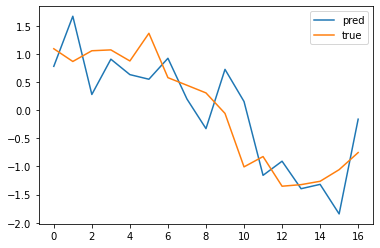

In [1015]:
plt.plot(fitted_model1.predict(test_x_variable),label="pred")
plt.plot(np.array(test_target),label="true")
plt.legend()
plt.show()

In [1026]:
predict = fitted_model1.predict(test_x_variable)*target_daily_score['target_close'].std()+target_daily_score['target_close'].mean()
result = pd.DataFrame(predict, columns=['predict_close'])

In [1027]:
result['target_close']=test_target*target_daily_score['target_close'].std()+target_daily_score['target_close'].mean()

In [1028]:
result = pd.merge(left = result , right = target_daily_score[['date','vol','close','target_date']], 
                              left_index=True, right_index=True)

In [1029]:
result['Greed_Fear_Score']=(result['predict_close']-result['close'])/result['close']*1000
result['difference']=result['target_close']-result['close']

In [1030]:
result['correct'] =pd.Series() 

/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_40902/585479656.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result['correct'] =pd.Series()


In [1031]:
for i in range(len(result)):
    if result['Greed_Fear_Score'].iloc[i] * result['difference'].iloc[i] > 0:
        result['correct'].iloc[i] =True
    else : 
        result['correct'].iloc[i] =False

/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_40902/1223812296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['correct'].iloc[i] =True


In [1036]:
result.to_csv('bit_coin_result')

In [1033]:
result[['date','predict_close','vol','close','Greed_Fear_Score','target_date']].to_csv('Bitcoin_visualize_data')

In [1034]:
plt.figure(figsize=(20,8))
plt.plot(result['predict_close'],label="predict price", color='red')
plt.plot(result['target_close'],label="coin price", color='blue')
plt.xticks(result.index,result['target_date'])
plt.legend()
plt.show()